# AI Tech Challange - Inference and Model Evaluation Script

**This challenge is a component of the selection process for the Bosch Technical Innovation Engineer - Artificial Intelligence position.**
* Title: Child Seat Localization
* Goal: build AI solution for child seat localization in the passenger vehicle
* Problem statement: localization of the child seat in the passenger vehicle enable the business to high-level services and use cases
* Deadline: September 4th 2023
* Data set used: [SVIRO](https://sviro.kl.dfki.de/) e [TICaM](https://vizta-tof.kl.dfki.de/cabin-dataset/)
* Participant: Dr. Ilan Sousa Figueiredo

## Importing Python Libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display
from PIL import Image

In [ ]:
# outsite YOLOv5
os.chdir('../')

In [2]:
DIR_PATH = 'yolov5'
MODEL_PATH = 'yolov5/runs/train/exp/weights/best.pt'
IMG = './datasets/sviro/test_with_labels/images/aclass_test_imageID_0_GT_3_0_6.png' #any image

## Inference

Loads the-trained YOLOv5s model from PyTorch Hub as model and passes an image for inference

In [6]:
# Loas trained model
model = torch.hub.load(DIR_PATH, 'custom', path=MODEL_PATH, source='local', device=9)

# Inference
results = model(IMG)

YOLOv5 🚀 2023-8-27 Python-3.8.17 torch-1.8.0 CUDA:9 (Tesla V100-SXM3-32GB, 32511MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


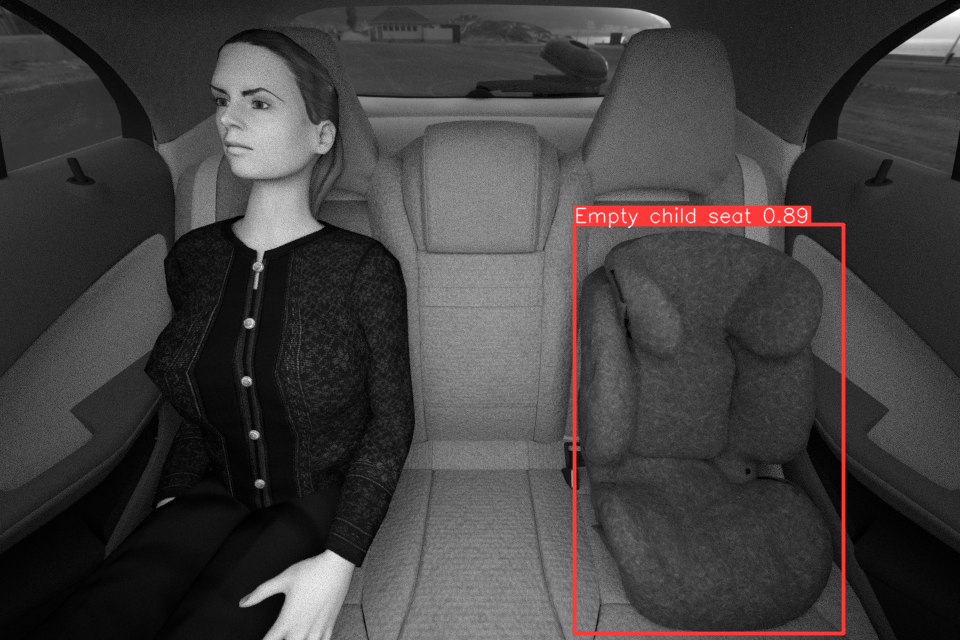

image 1/1: 640x960 1 Empty child seat
Speed: 24.8ms pre-process, 14.3ms inference, 1.8ms NMS per image at shape (1, 3, 448, 640)


xmin        ymin        xmax        ymax  confidence  class  \
0  574.851929  224.096466  843.363281  633.299622    0.890907      0   

               name  
0  Empty child seat

In [8]:
# Results
results.show()  # or .print(), .save(), .crop(), .pandas(), etc.
results.print()
results.pandas().xyxy[0]

## Evaluation Performance

In [ ]:
# inside YOLOv5
os.chdir('./yolov5')

In [ ]:
!python val.py --weights yolov5/runs/train/expo/weights/best.pt --device 0 --data dataset.yaml --img 640

### Display image labels
*  A few images

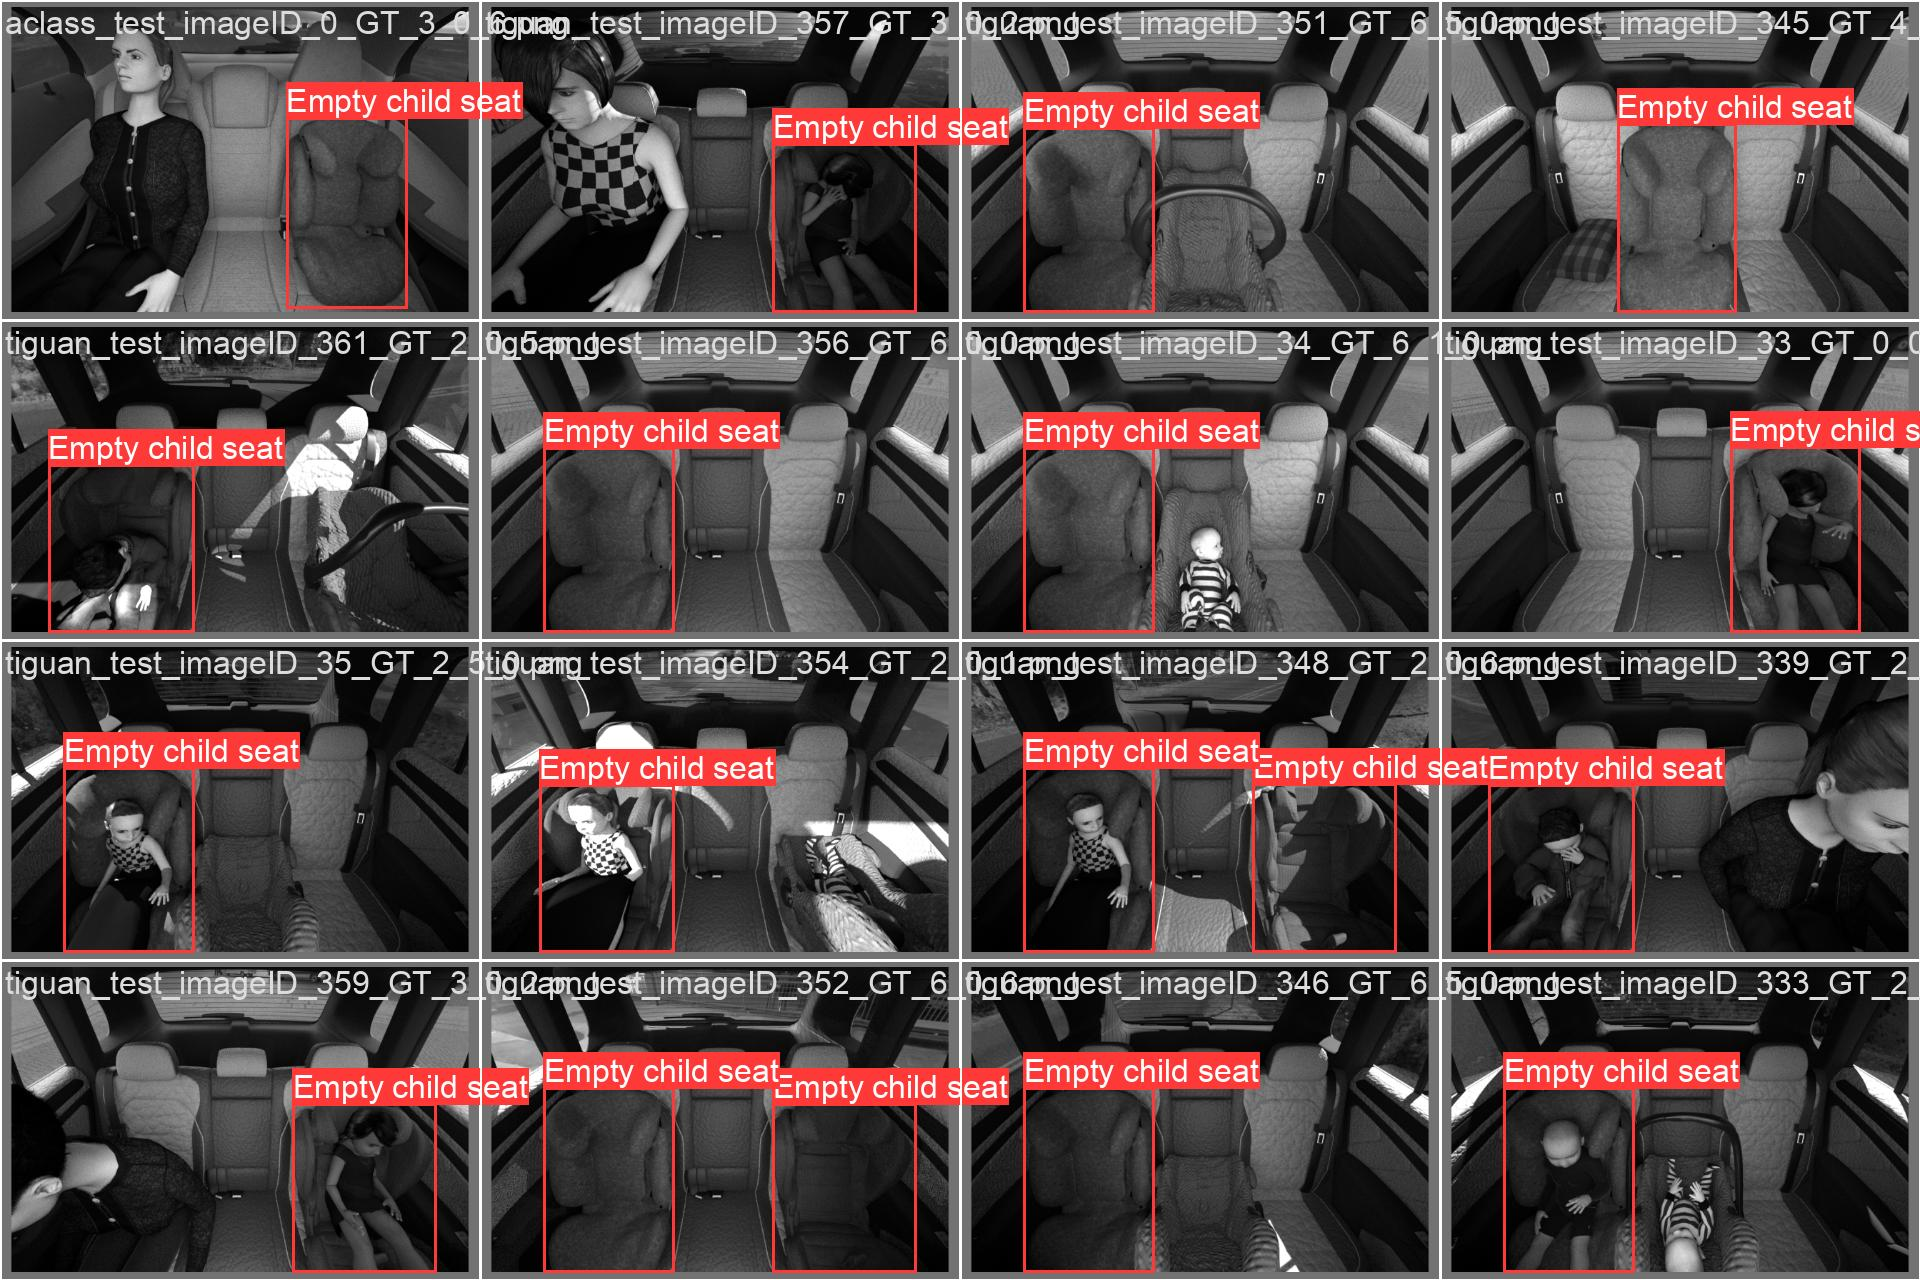

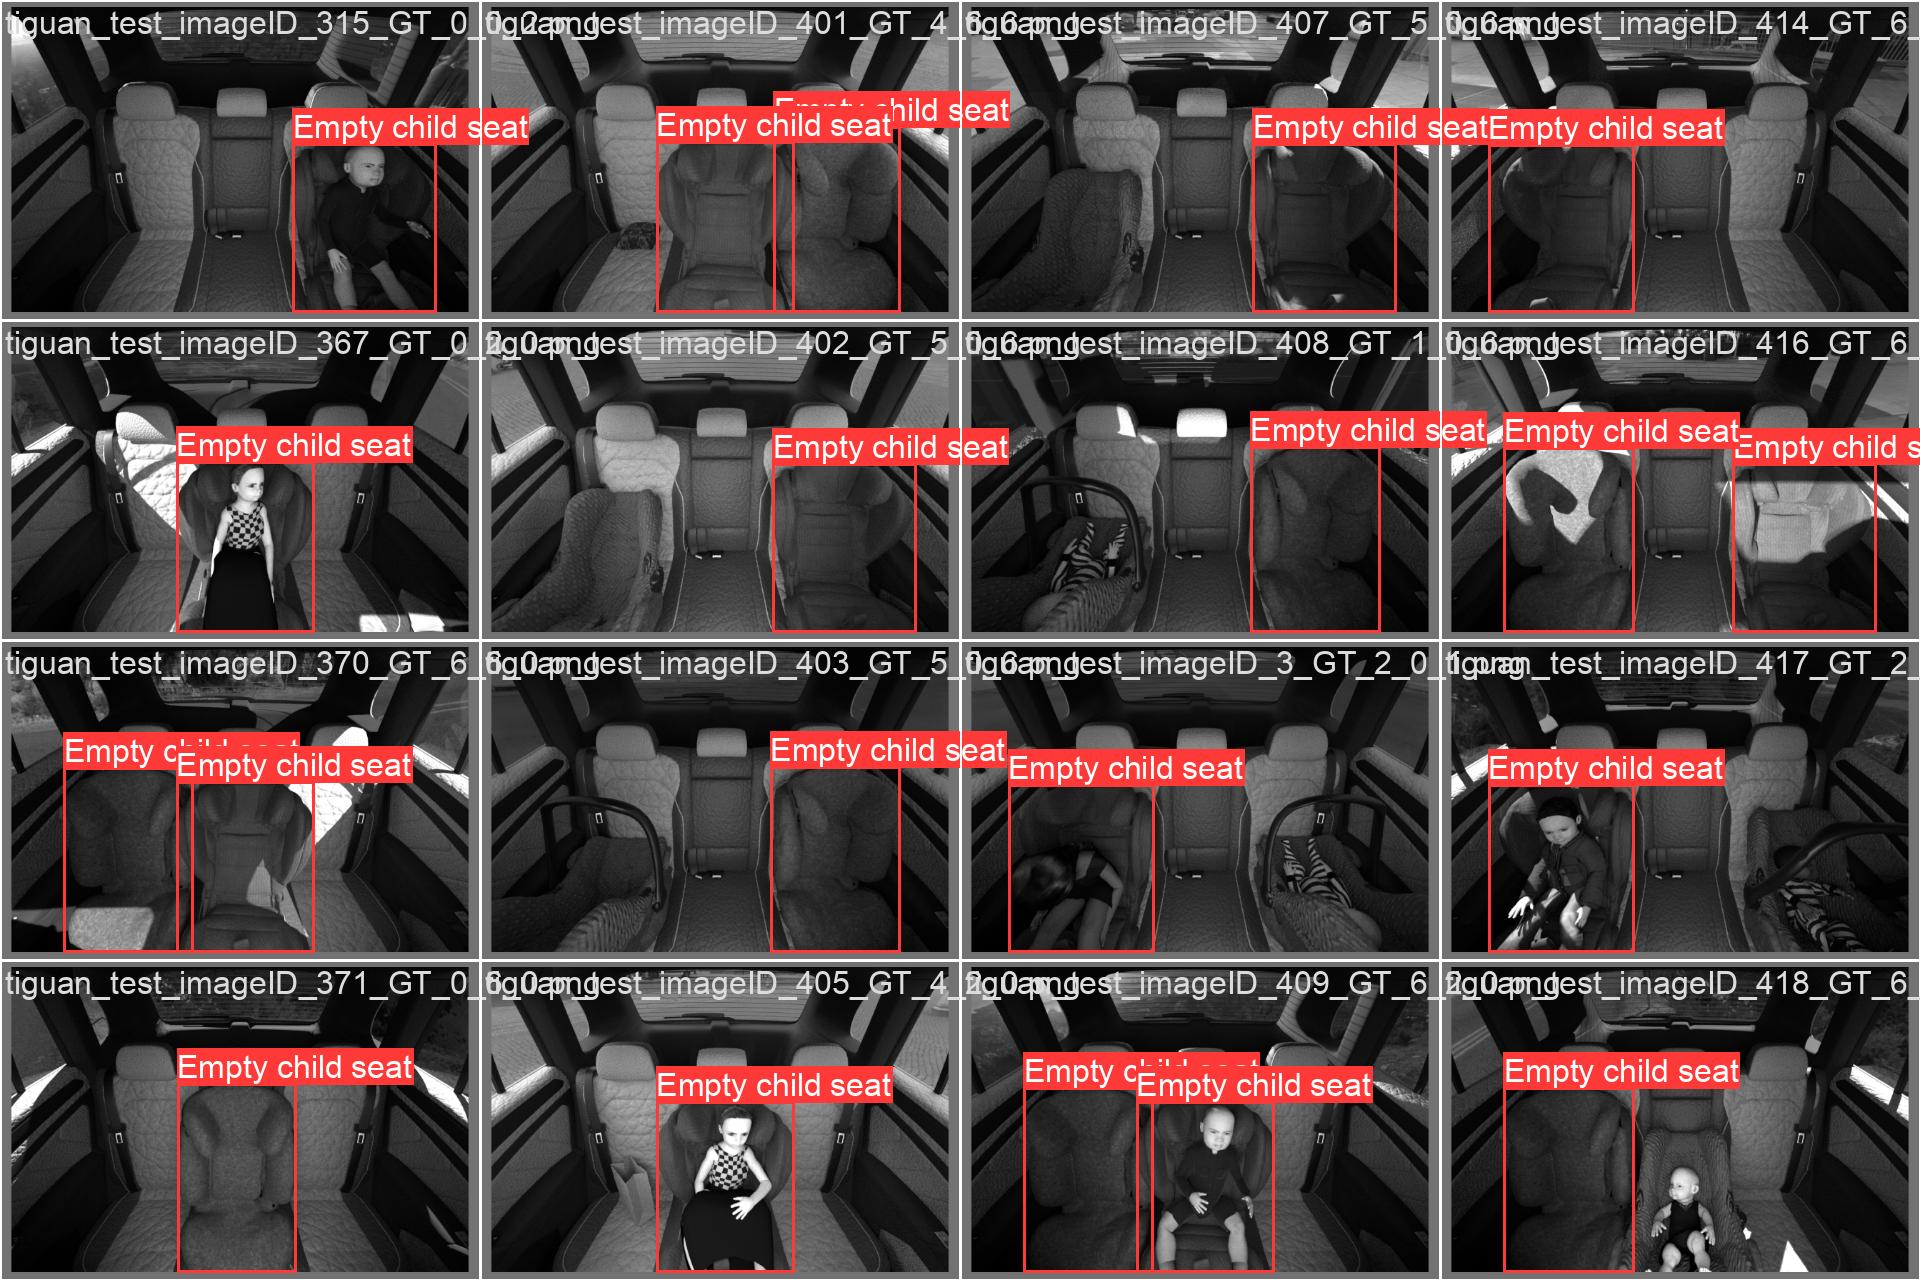

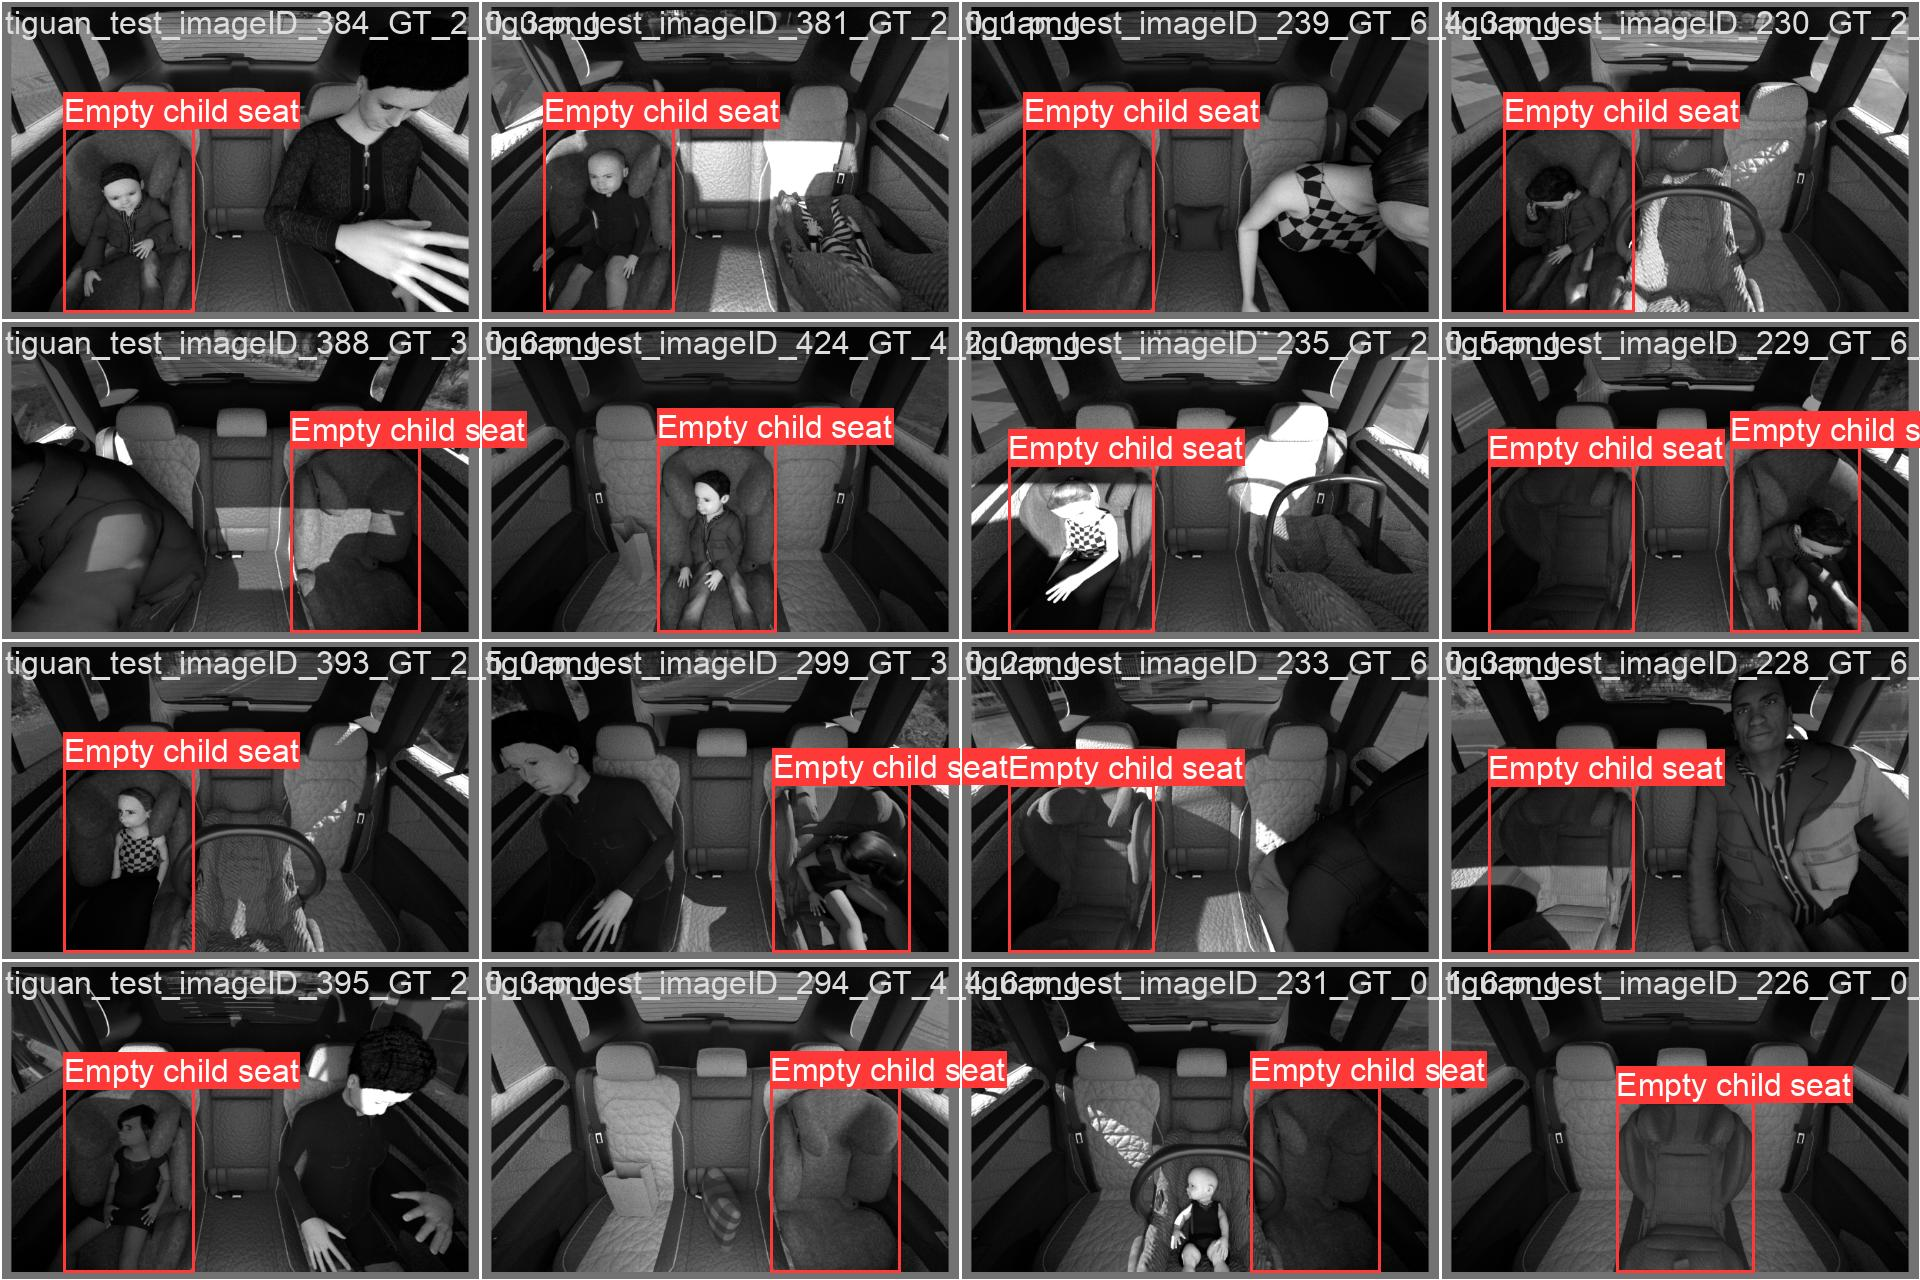

In [41]:
# Lists of image paths
images_labels = [
    "./runs/val/exp/val_batch0_labels.jpg",
    "./runs/val/exp/val_batch1_labels.jpg",
    "./runs/val/exp/val_batch2_labels.jpg"
]

# Number of images to display
num_images = len(images_labels)  # Display all images in the lists

# Loop to display images side by side
for i in range(num_images):
    # Create a figure with two subplots (one row and two columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the ground truth (labels) image
    img_label = Image(filename=images_labels[i])
    display(img_label)
    axes[0].set_title("Ground Truth (Labels)")

    plt.tight_layout()
    plt.show()


# Display image predicted
*  Same images displayed above

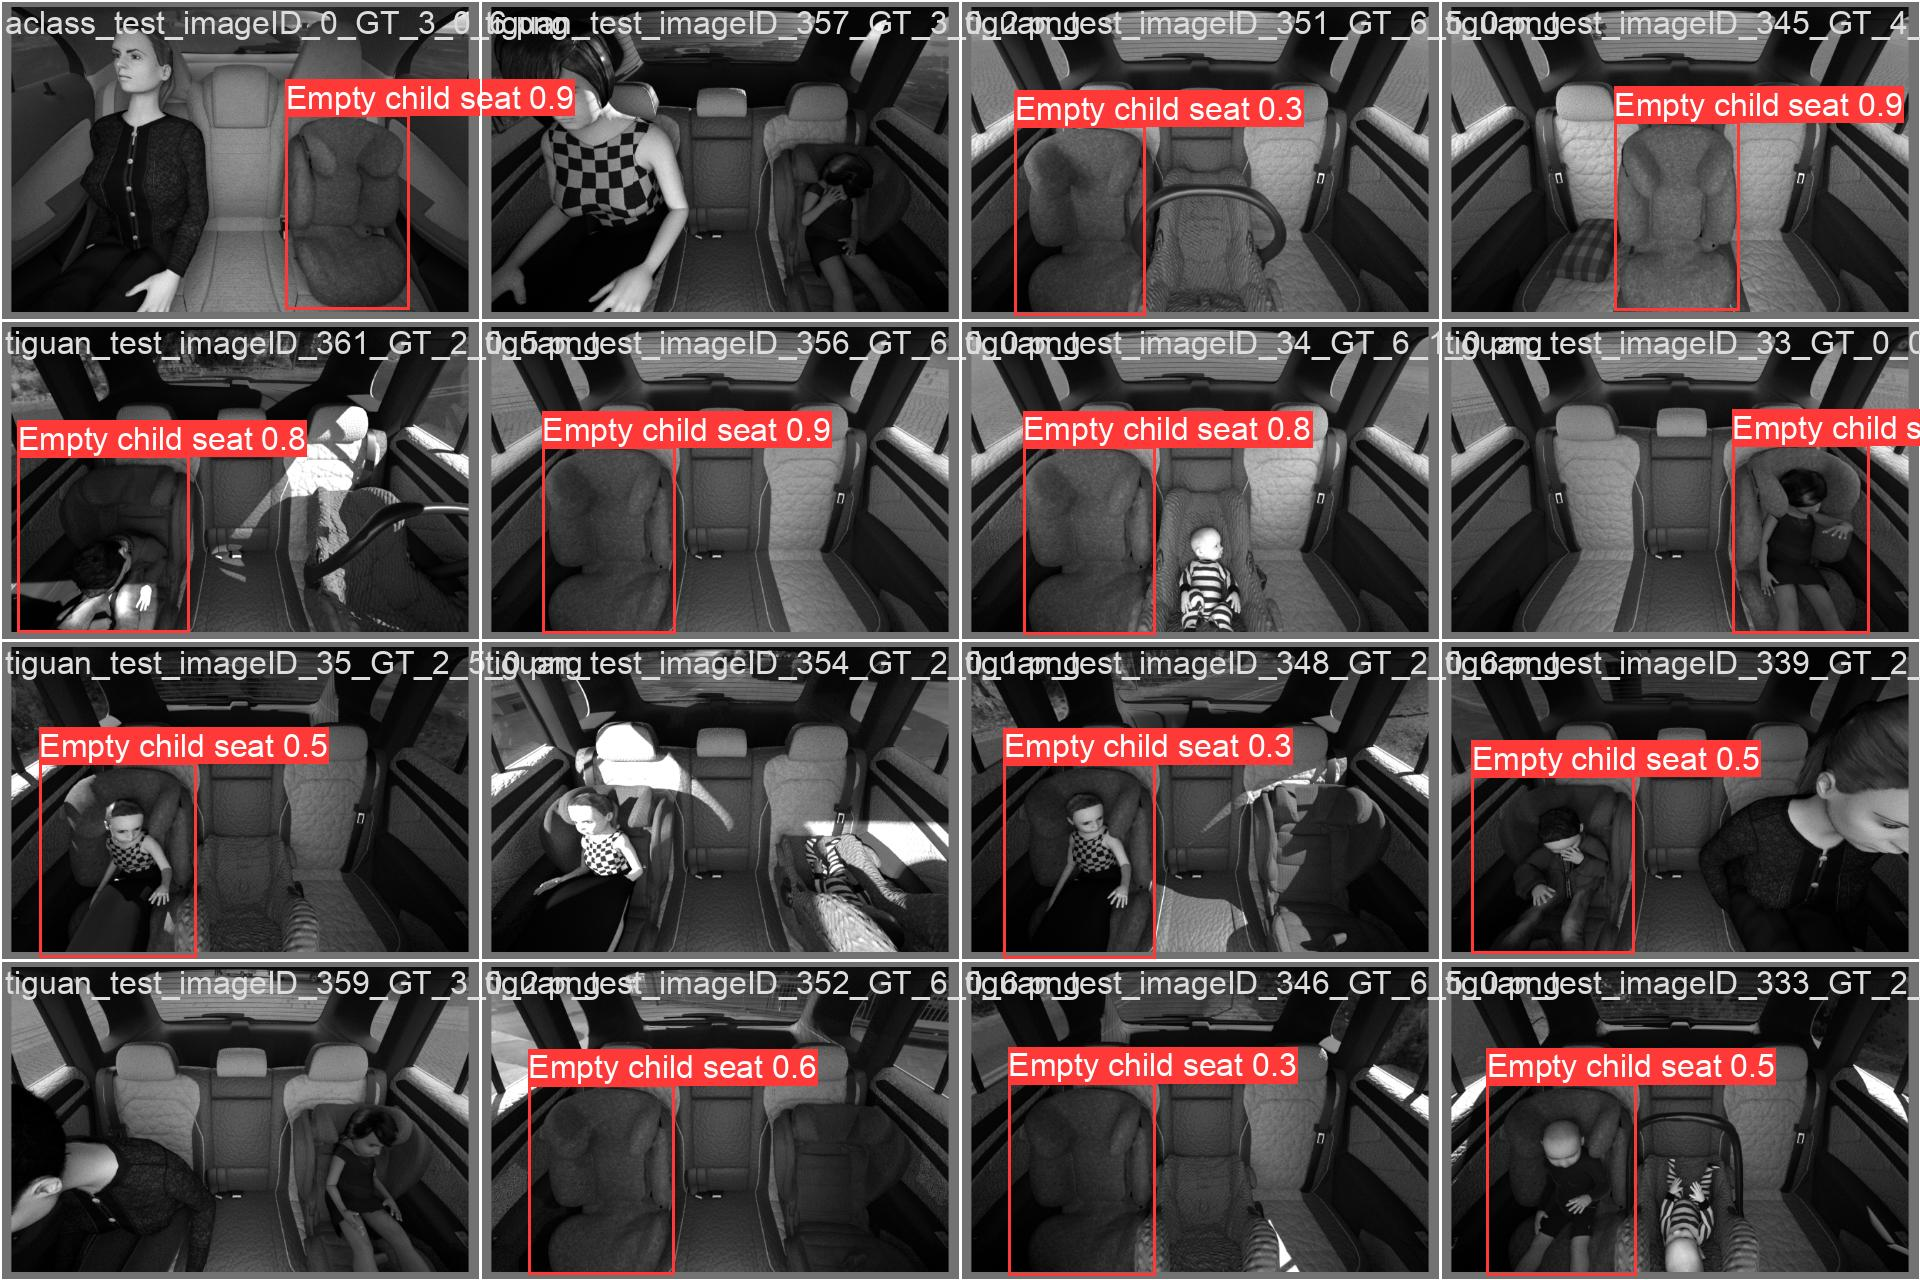

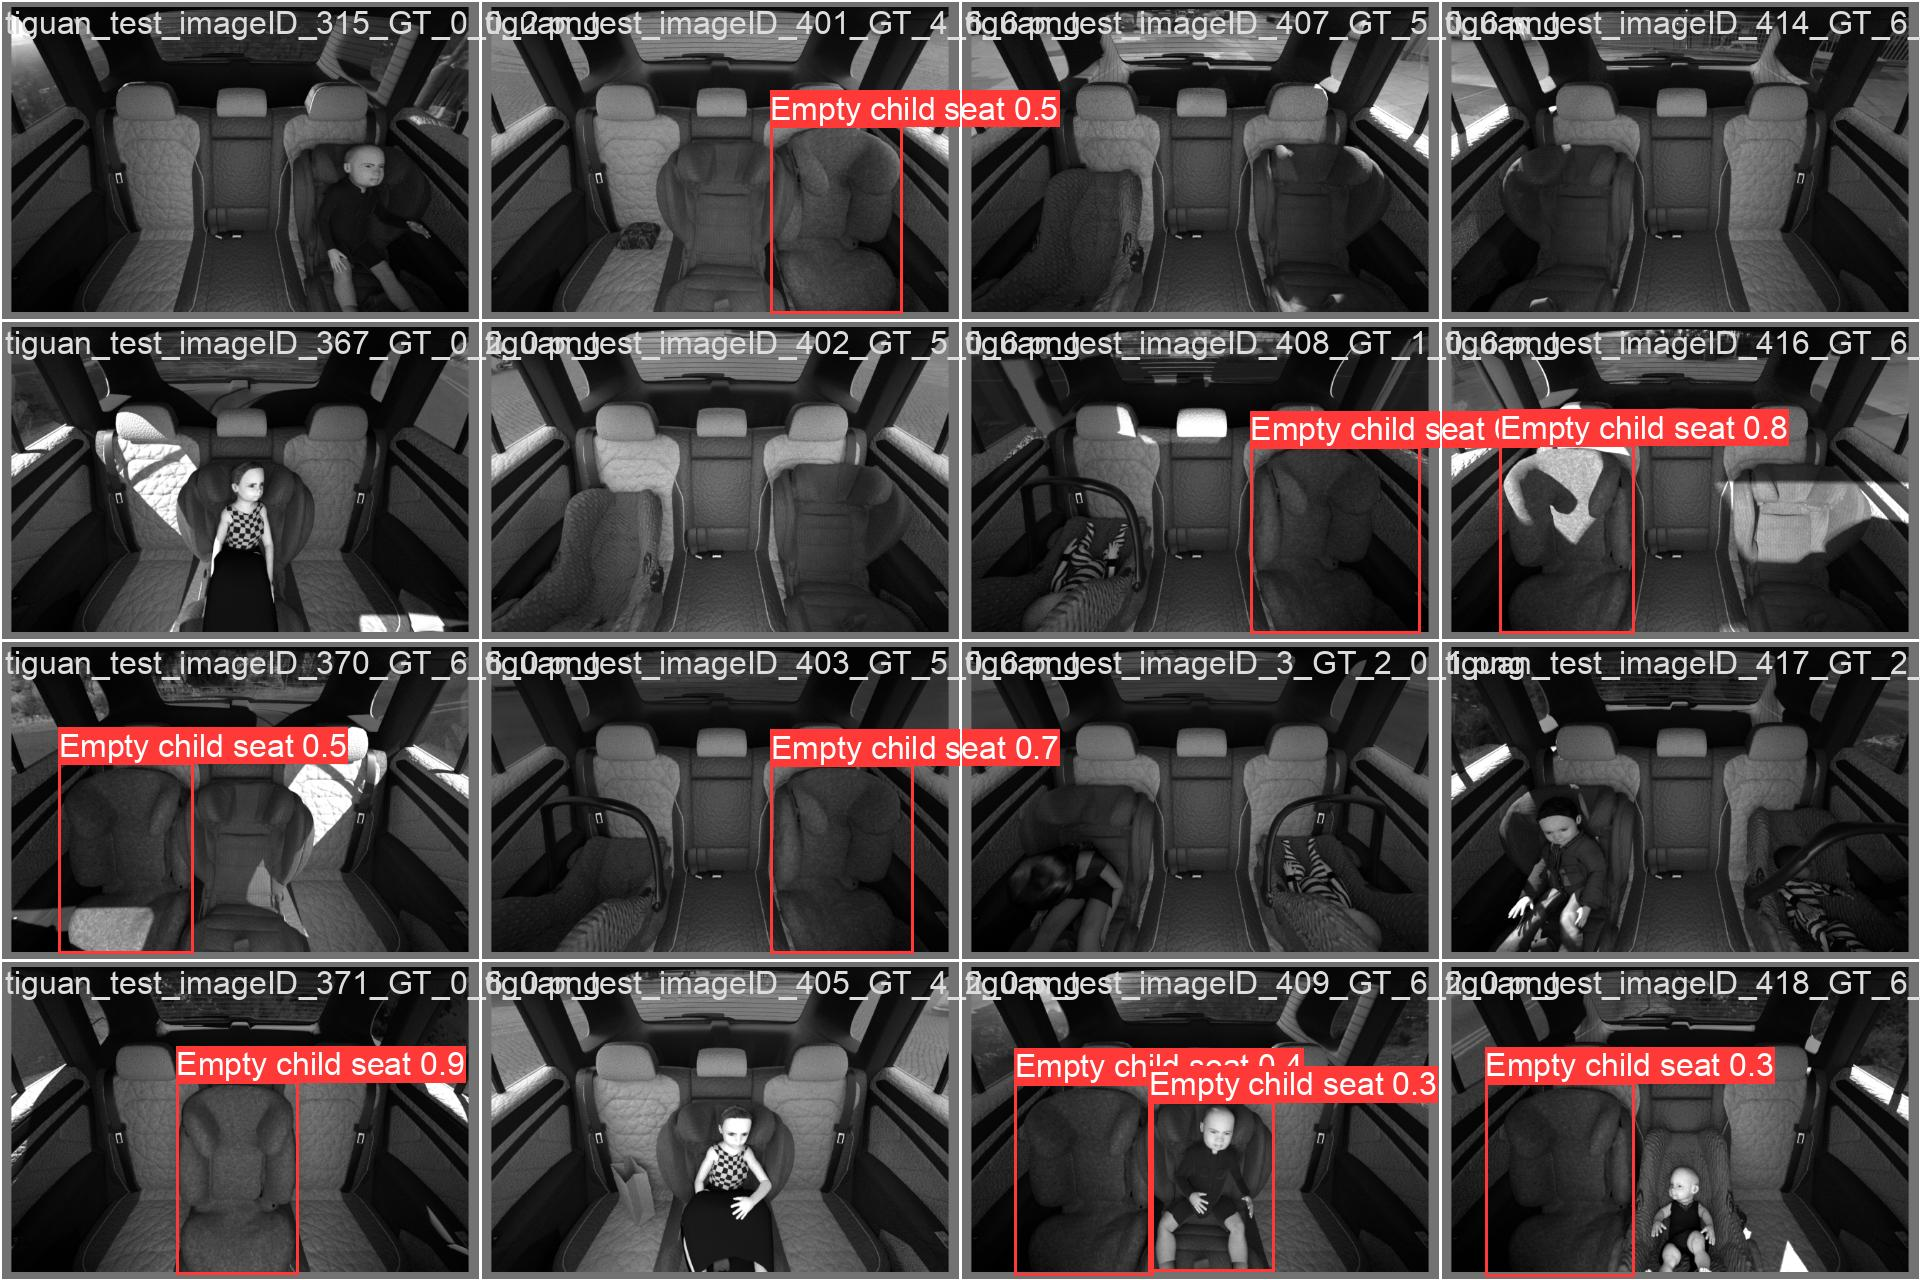

In [45]:
# Lists of image paths
images_preds = [
    "./runs/val/exp/val_batch0_pred.jpg",
    "./runs/val/exp/val_batch1_pred.jpg",
    "./runs/val/exp/val_batch2_pred.jpg"
]

# Number of images to plot
num_images = 2  # Change to the desired number of images to plot

# Loop to display the images in parallel
for i in range(num_images):
    # Create a figure with two subplots (one row and two columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the predictions image
    img_pred = Image(filename=images_preds[i])
    axes[0] = display(img_pred)
    # axes[0].set_title("Predictions")
    
    plt.tight_layout()
    plt.show()

### Metric

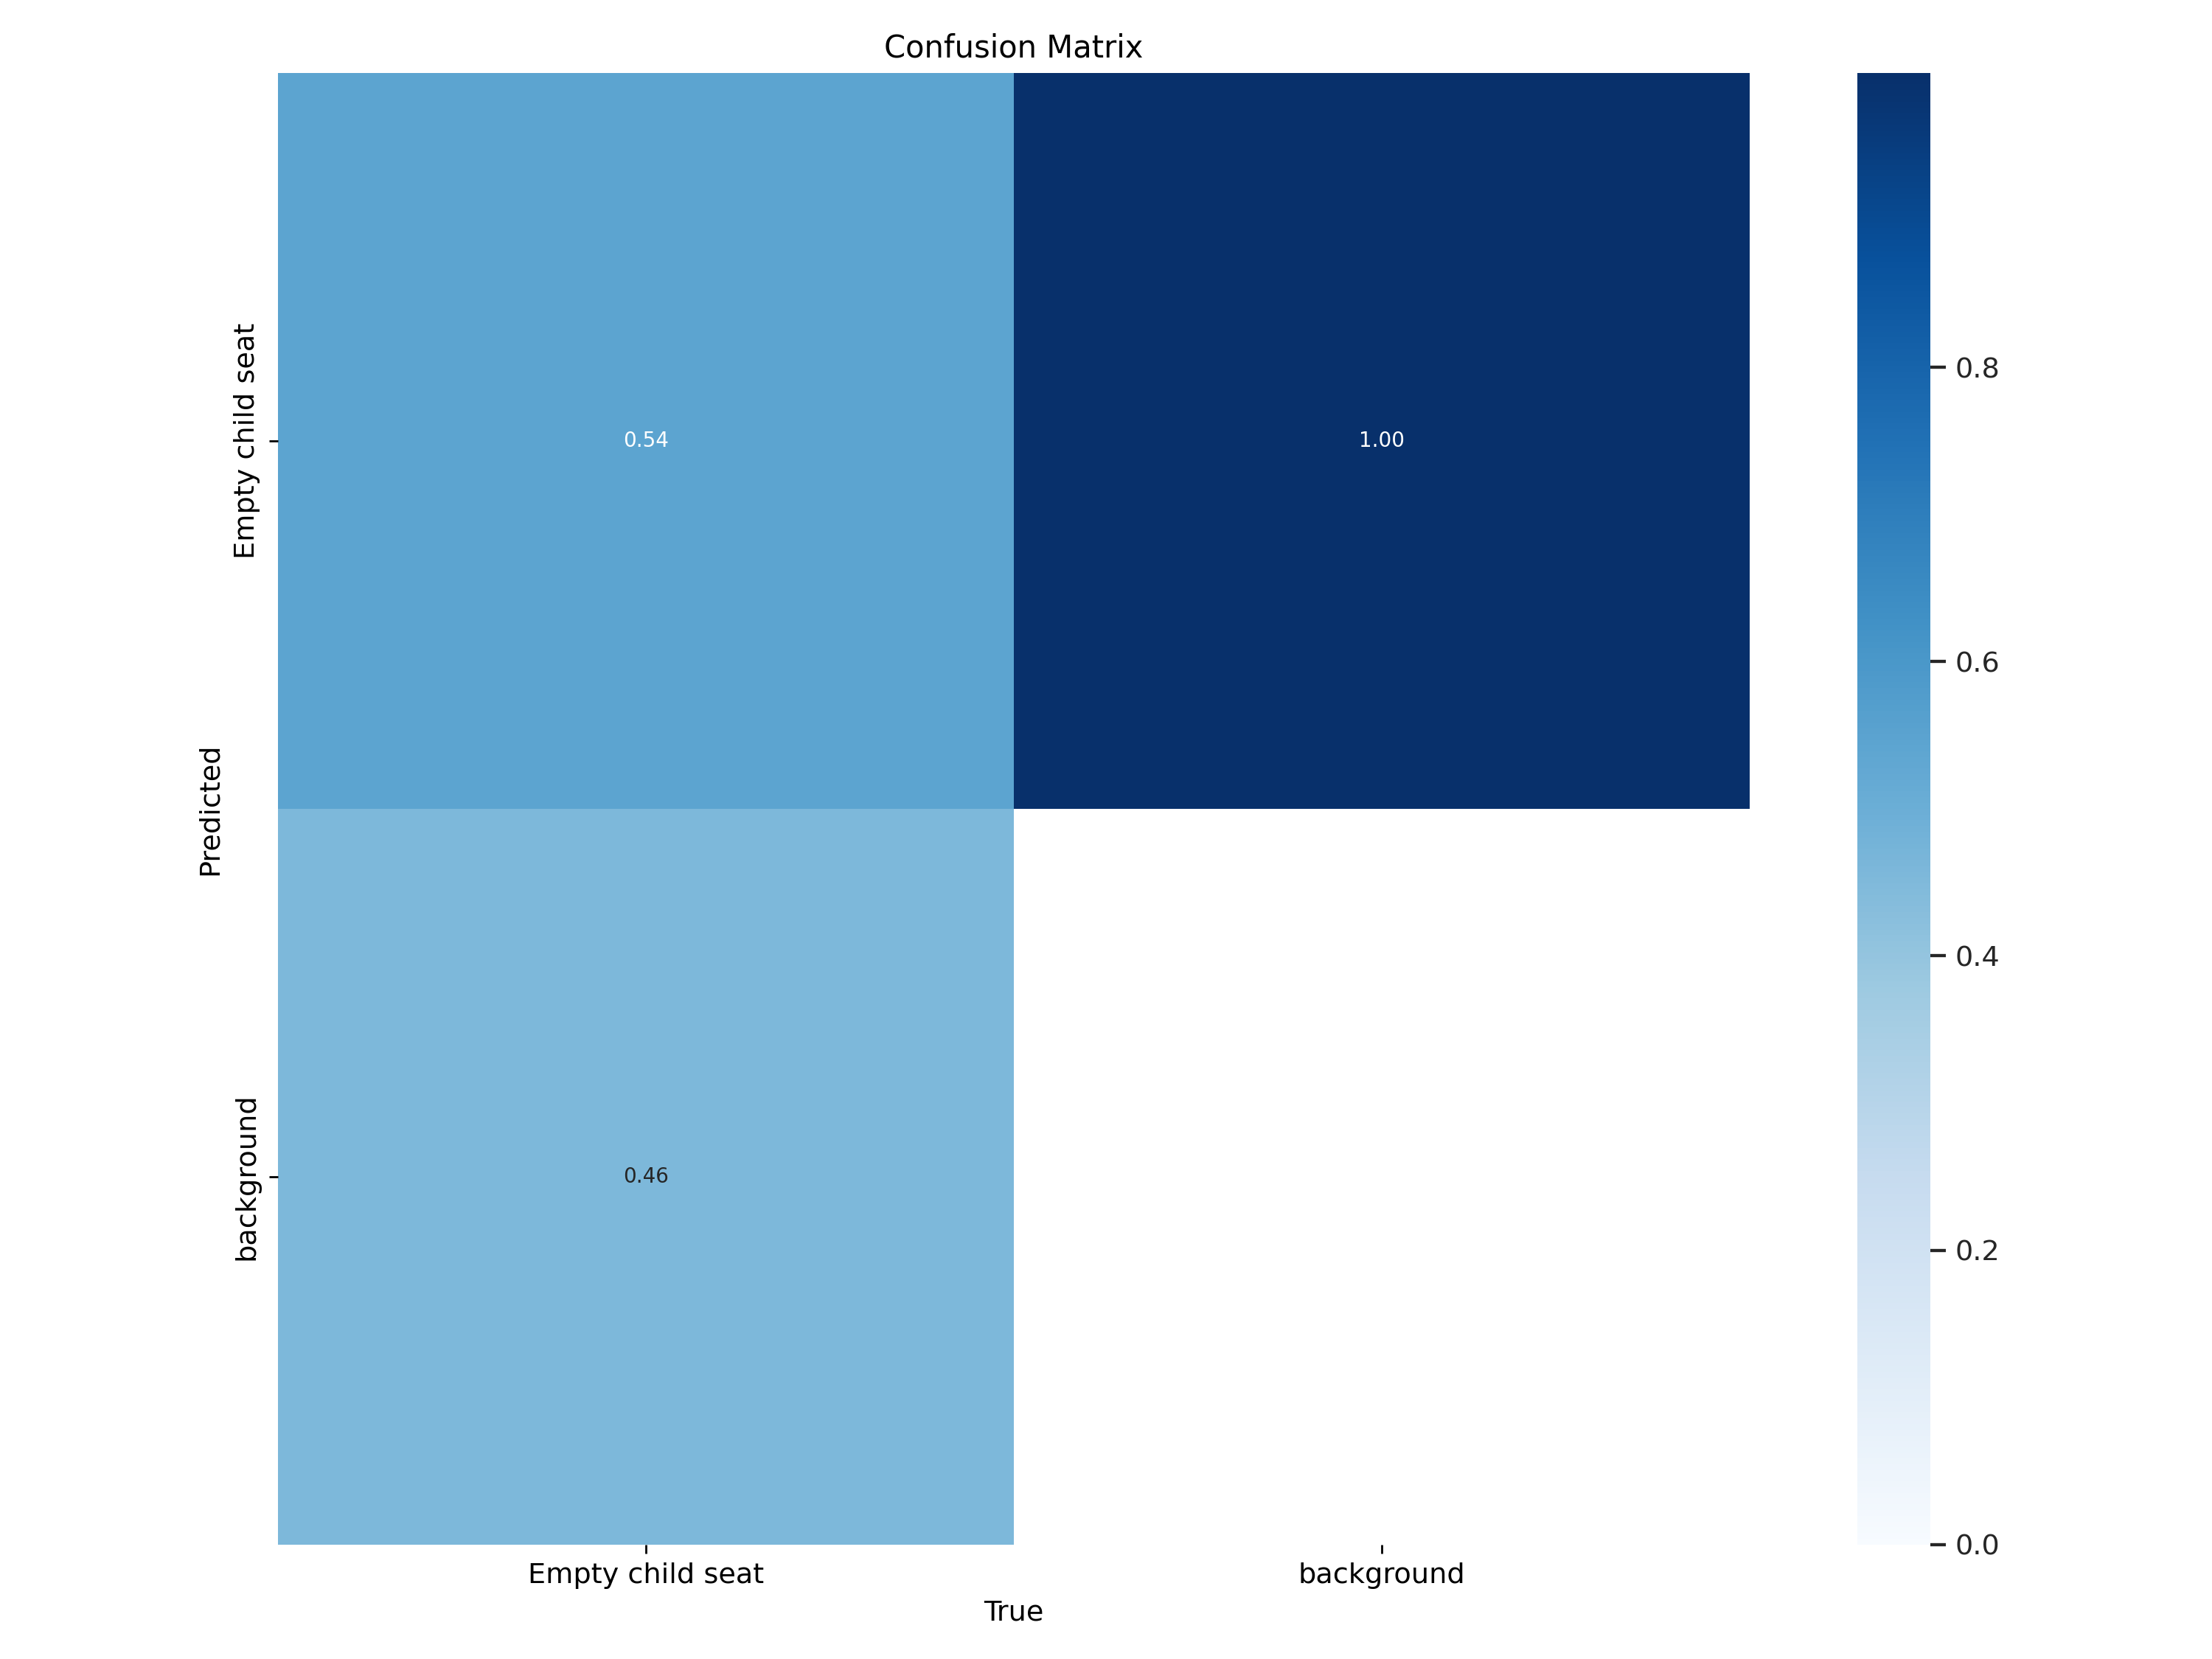

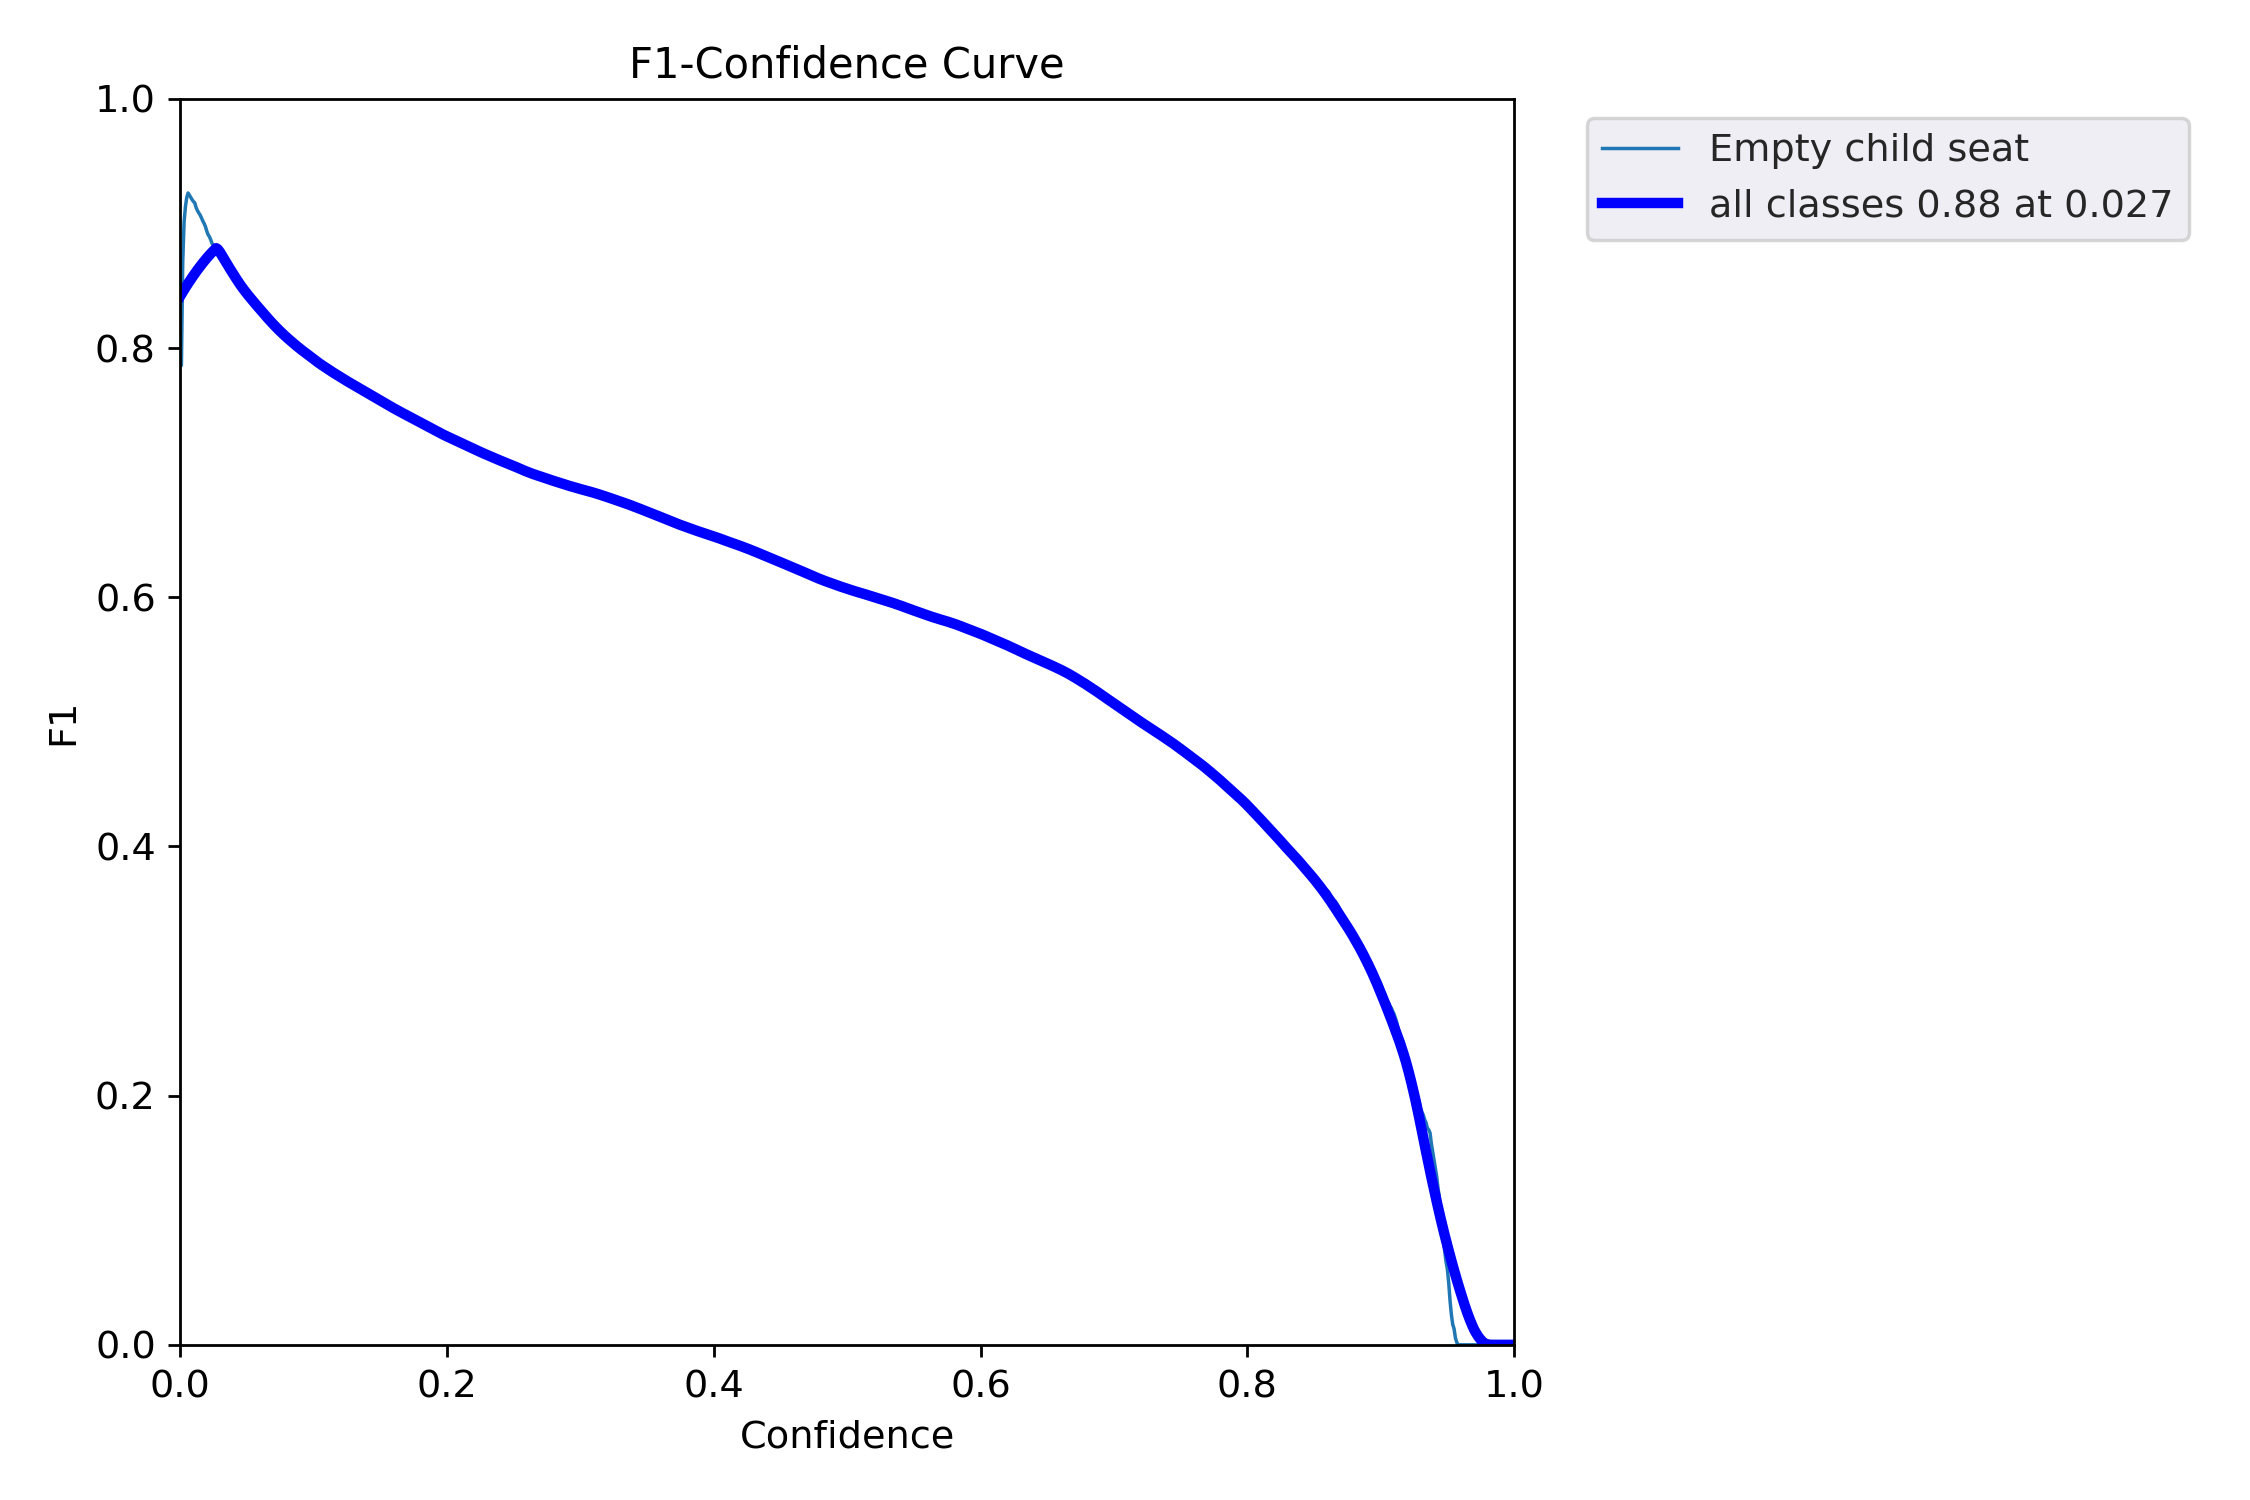

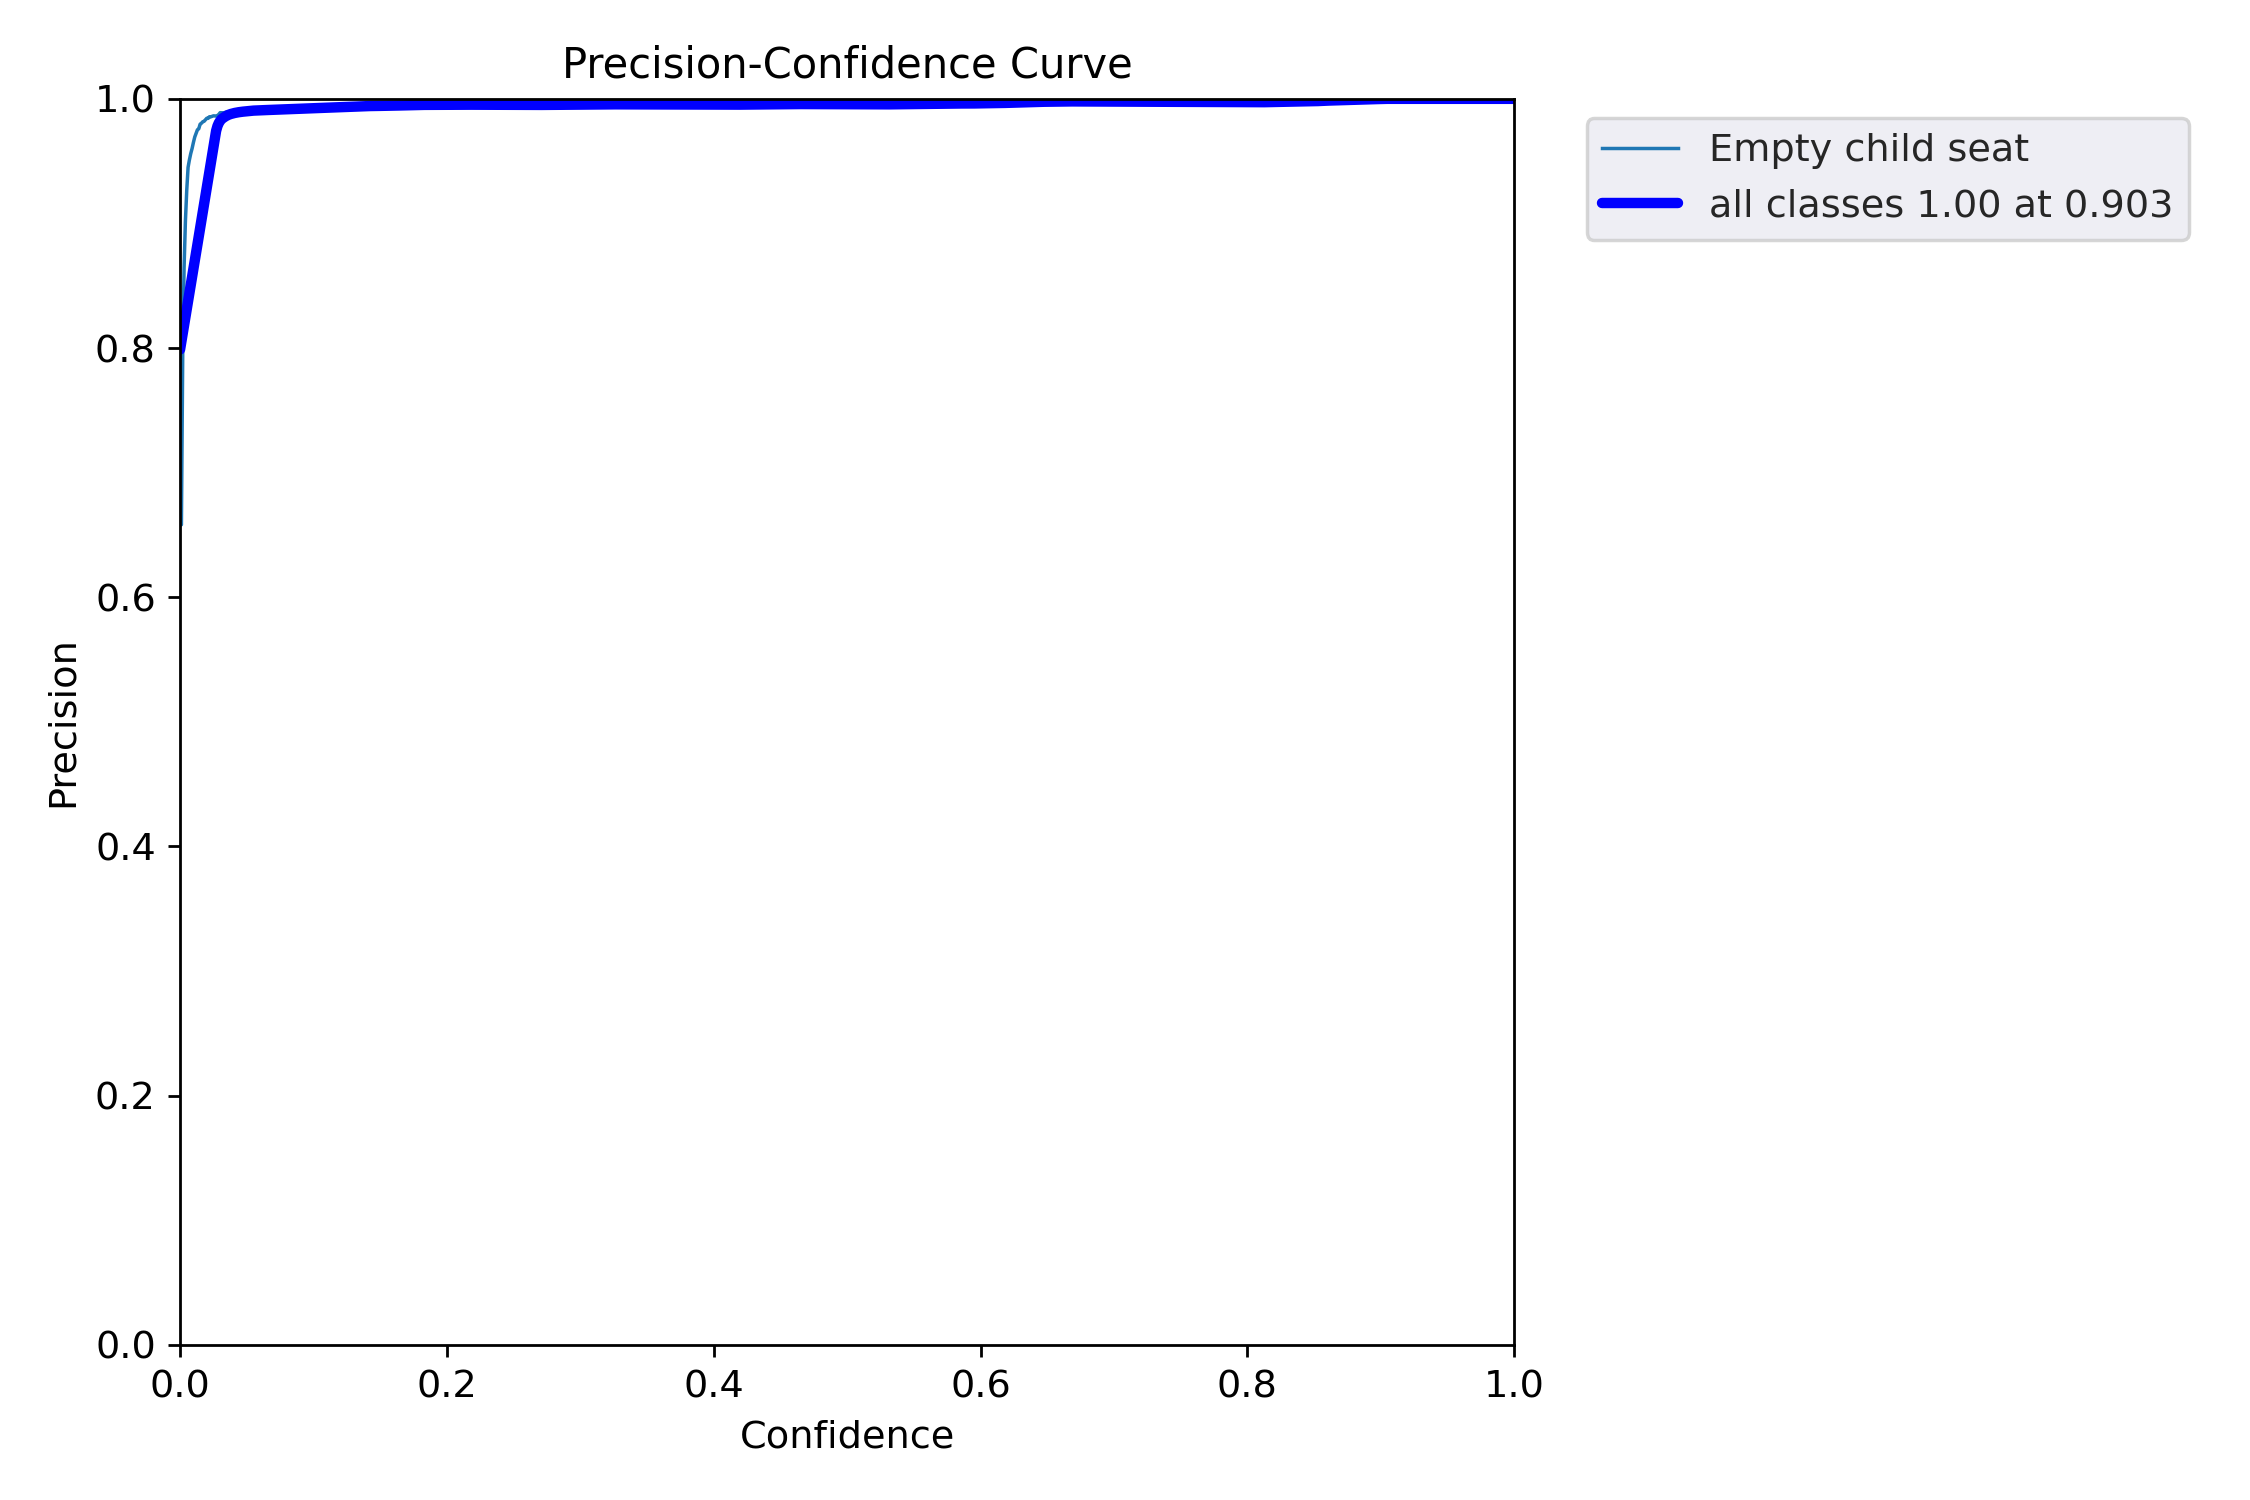

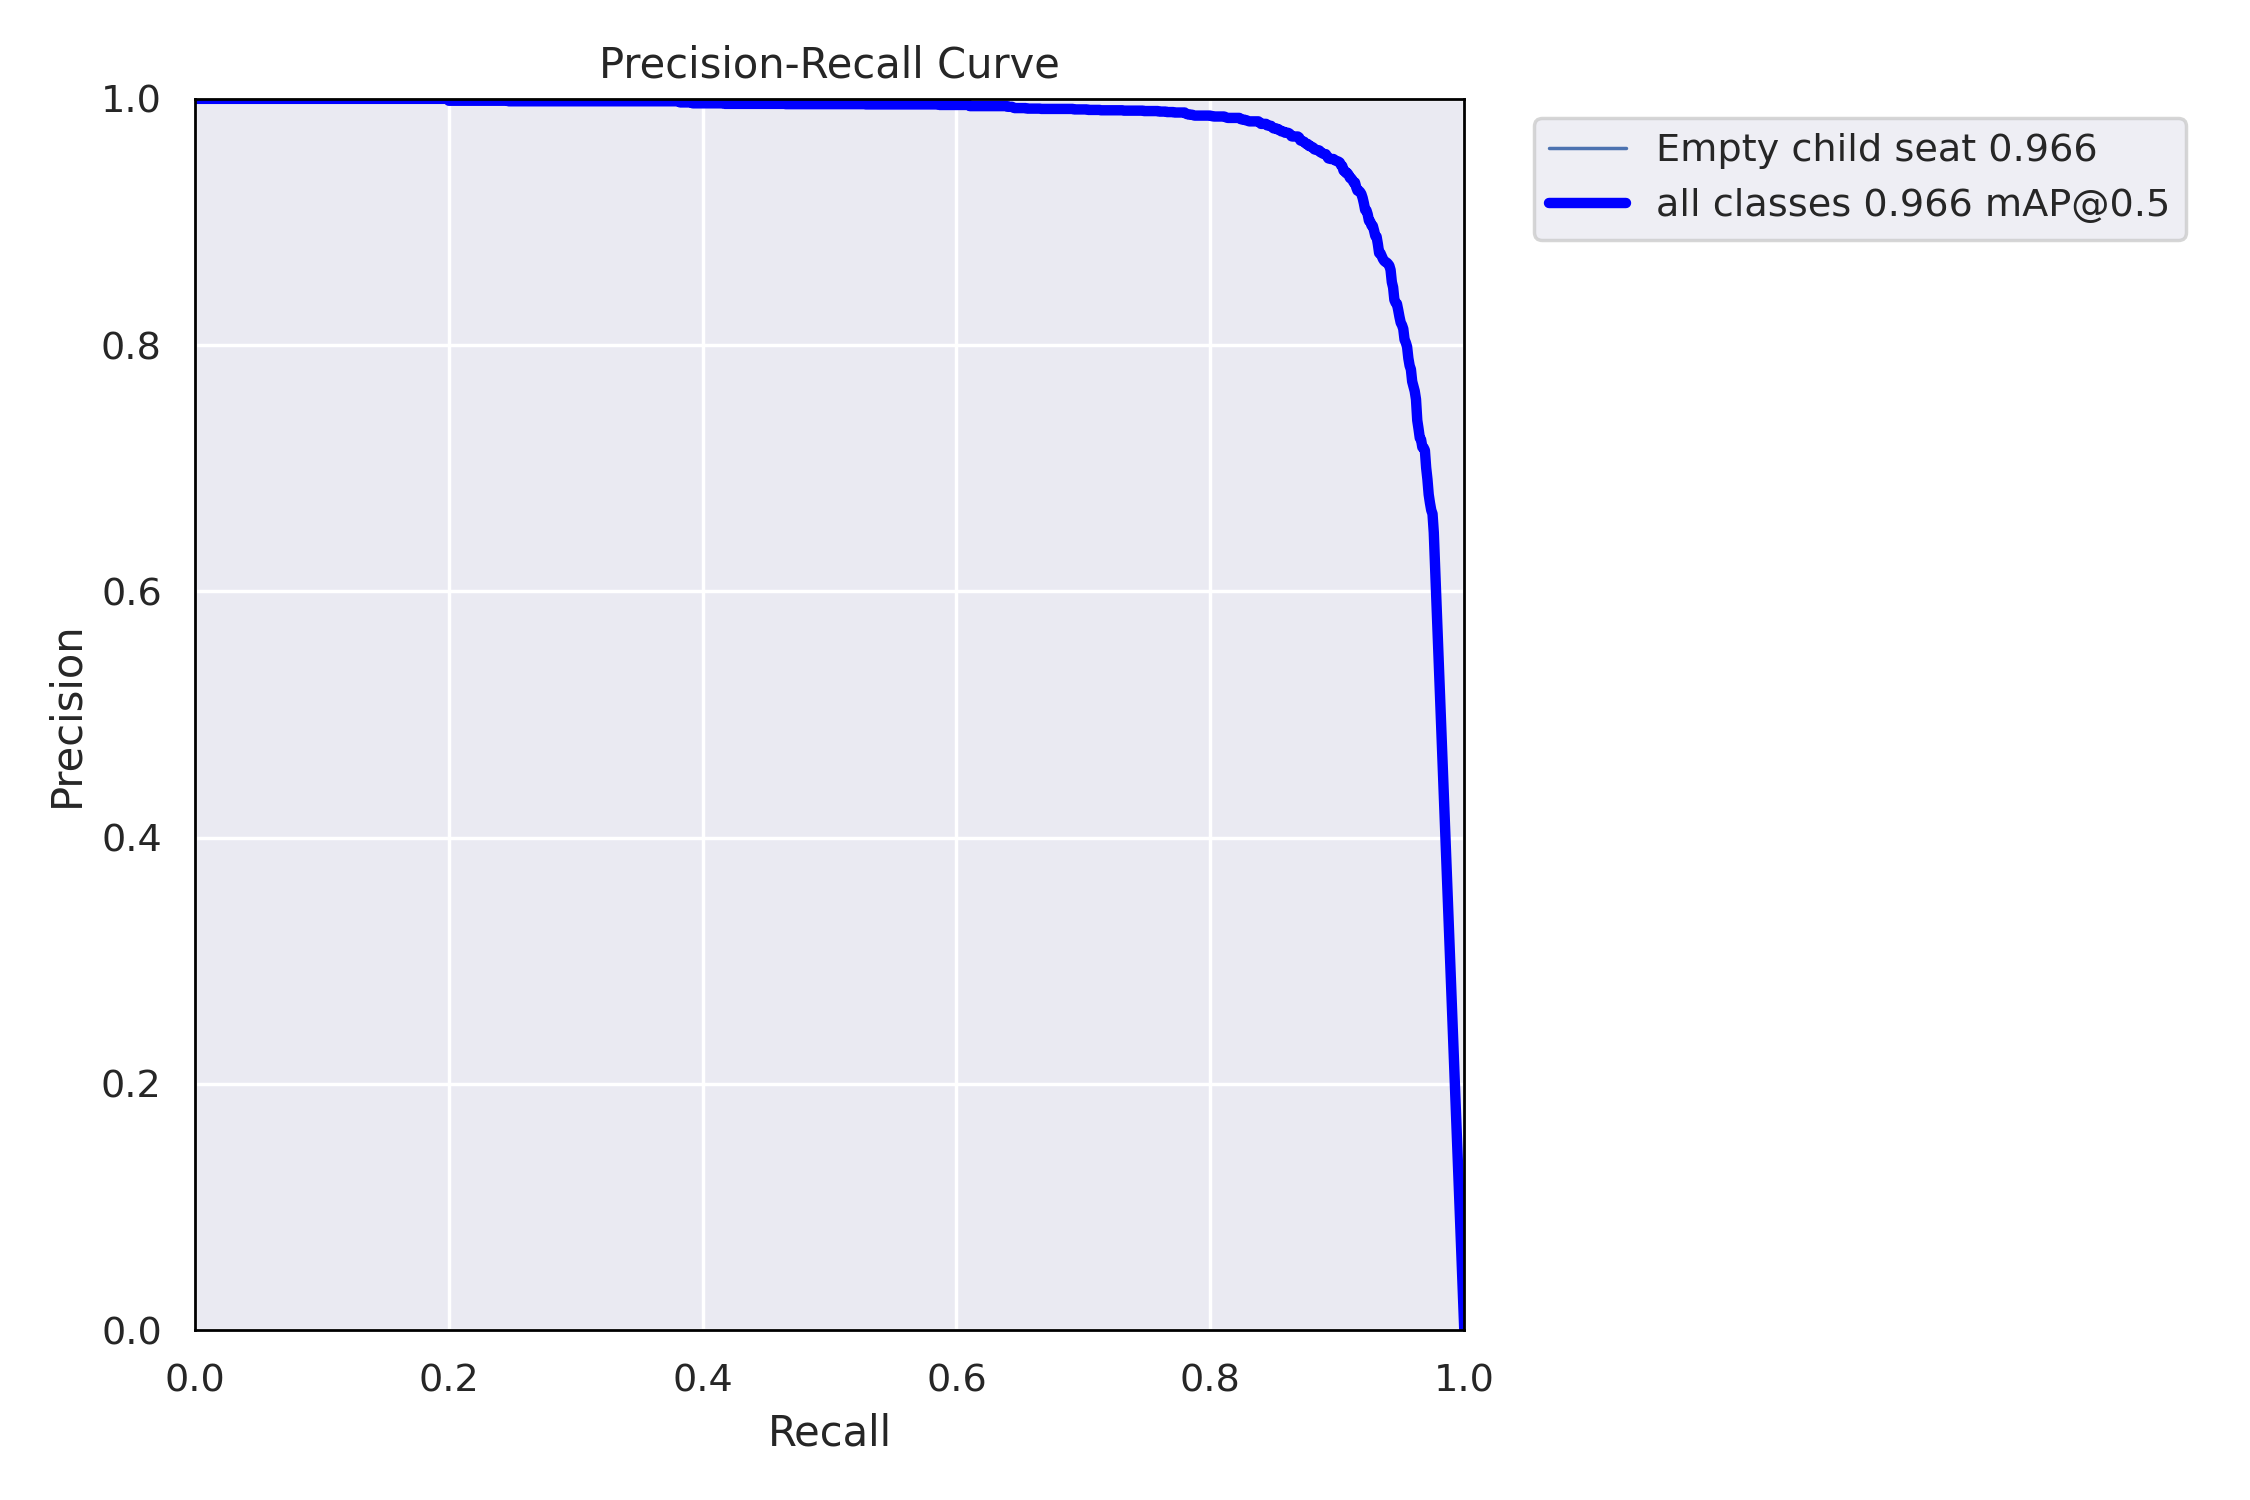

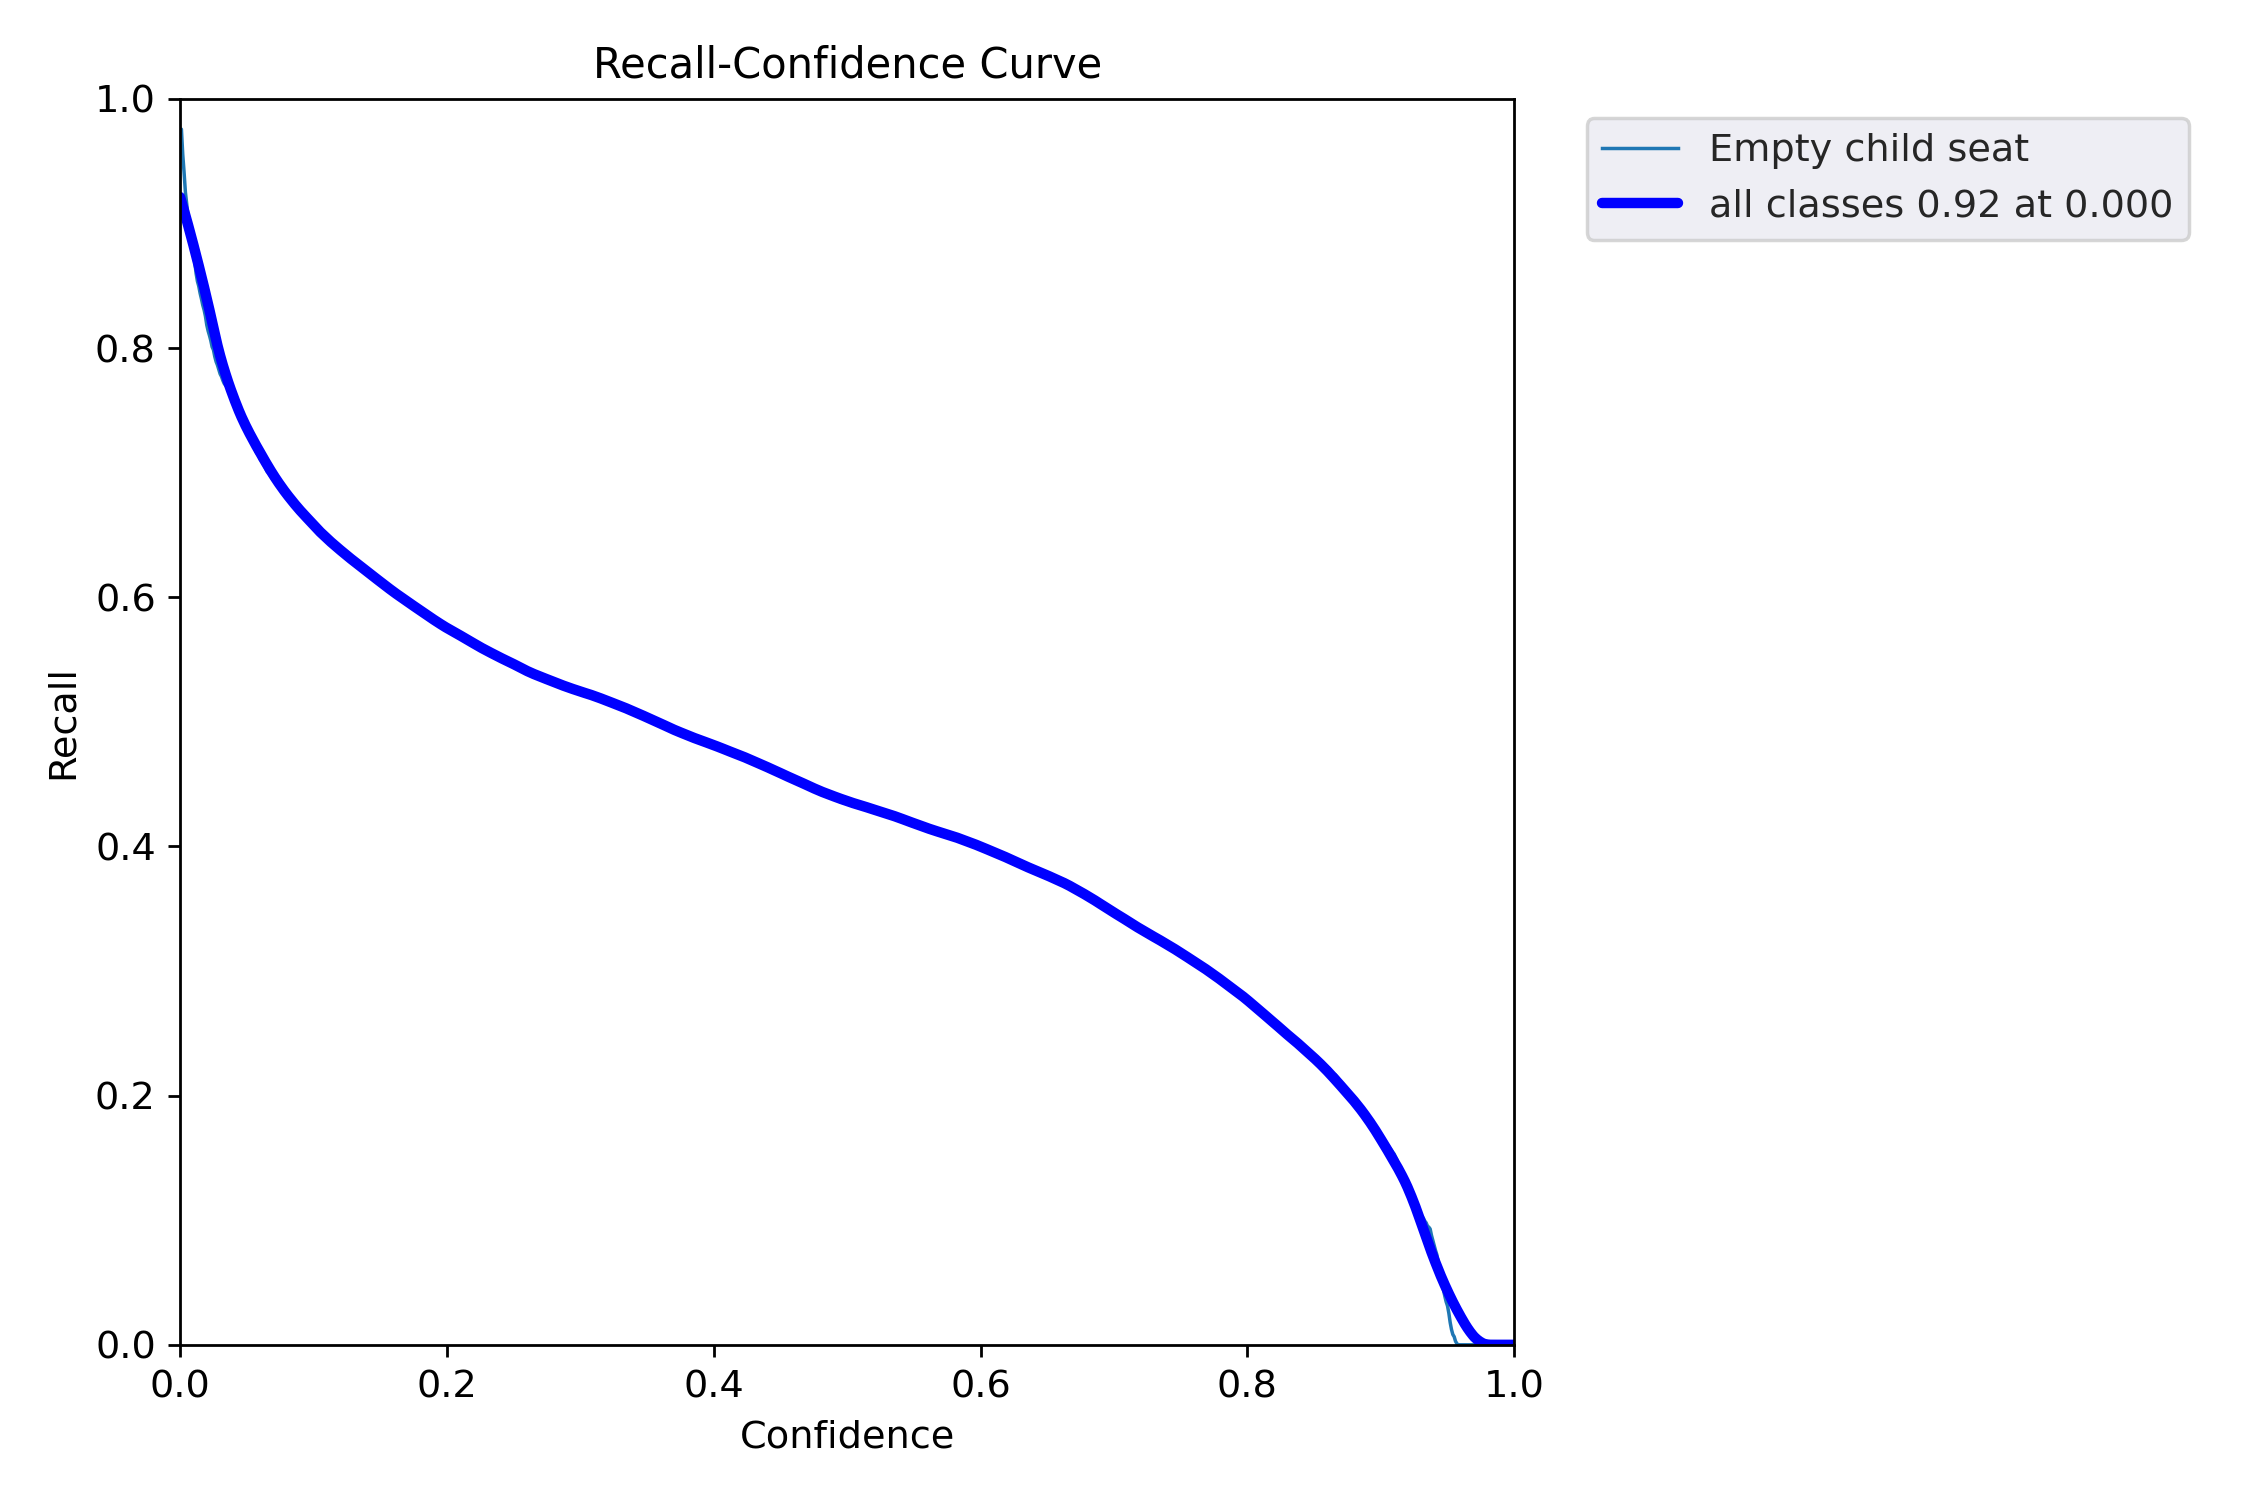

In [54]:
# Paths to the images
cm_path = './runs/val/exp/confusion_matrix.png'
f1_curve_path = './runs/val/exp/F1_curve.png'
p_curve_path = './runs/val/exp/P_curve.png'
pr_curve_path = './runs/val/exp/PR_curve.png'
r_curve_path = './runs/val/exp/R_curve.png'

# Function to read and display the image
def plot_image(image_path, title):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    display(image)
    plt.close()

# Plot the images
plot_image(cm_path, "Confusion Matrix")
plot_image(f1_curve_path, "F1 Curve")
plot_image(p_curve_path, "P Curve")
plot_image(pr_curve_path, "PR Curve")
plot_image(r_curve_path, "R Curve")


## Comparing with a model trained with RGB images. 
The same conditions was applied, the only diference that was made using RGB images.

In [9]:
DIR_PATH = 'yolov5'
MODEL_PATH = 'yolov5/runs/train/exp_rgb/weights/best.pt'
IMG = '../datasets_rgb/sviro/test_with_labels/images/aclass_test_imageID_0_GT_3_0_6.png'

In [10]:
# Loas trained model
model = torch.hub.load(DIR_PATH, 'custom', path=MODEL_PATH, source='local', device=9)

# Inference
results = model(IMG)

YOLOv5 🚀 2023-8-27 Python-3.8.17 torch-1.8.0 CUDA:9 (Tesla V100-SXM3-32GB, 32511MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


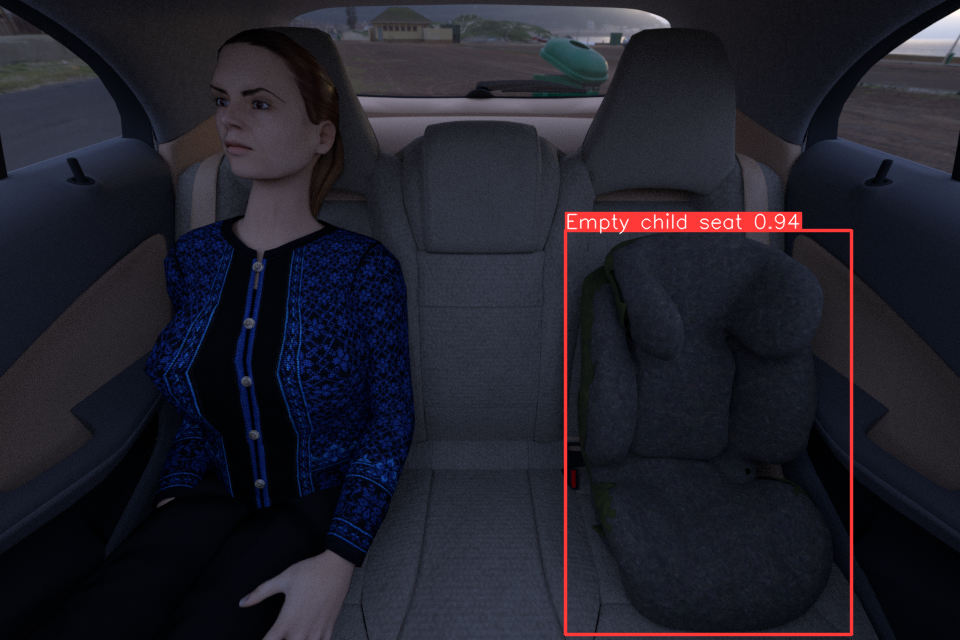

image 1/1: 640x960 1 Empty child seat
Speed: 23.8ms pre-process, 6.4ms inference, 1.2ms NMS per image at shape (1, 3, 448, 640)


xmin        ymin        xmax        ymax  confidence  class  \
0  565.059265  230.546265  851.672485  634.041931    0.938557      0   

               name  
0  Empty child seat

In [11]:
# Results
results.show()  # or .print(), .save(), .crop(), .pandas(), etc.
results.print()
results.pandas().xyxy[0]

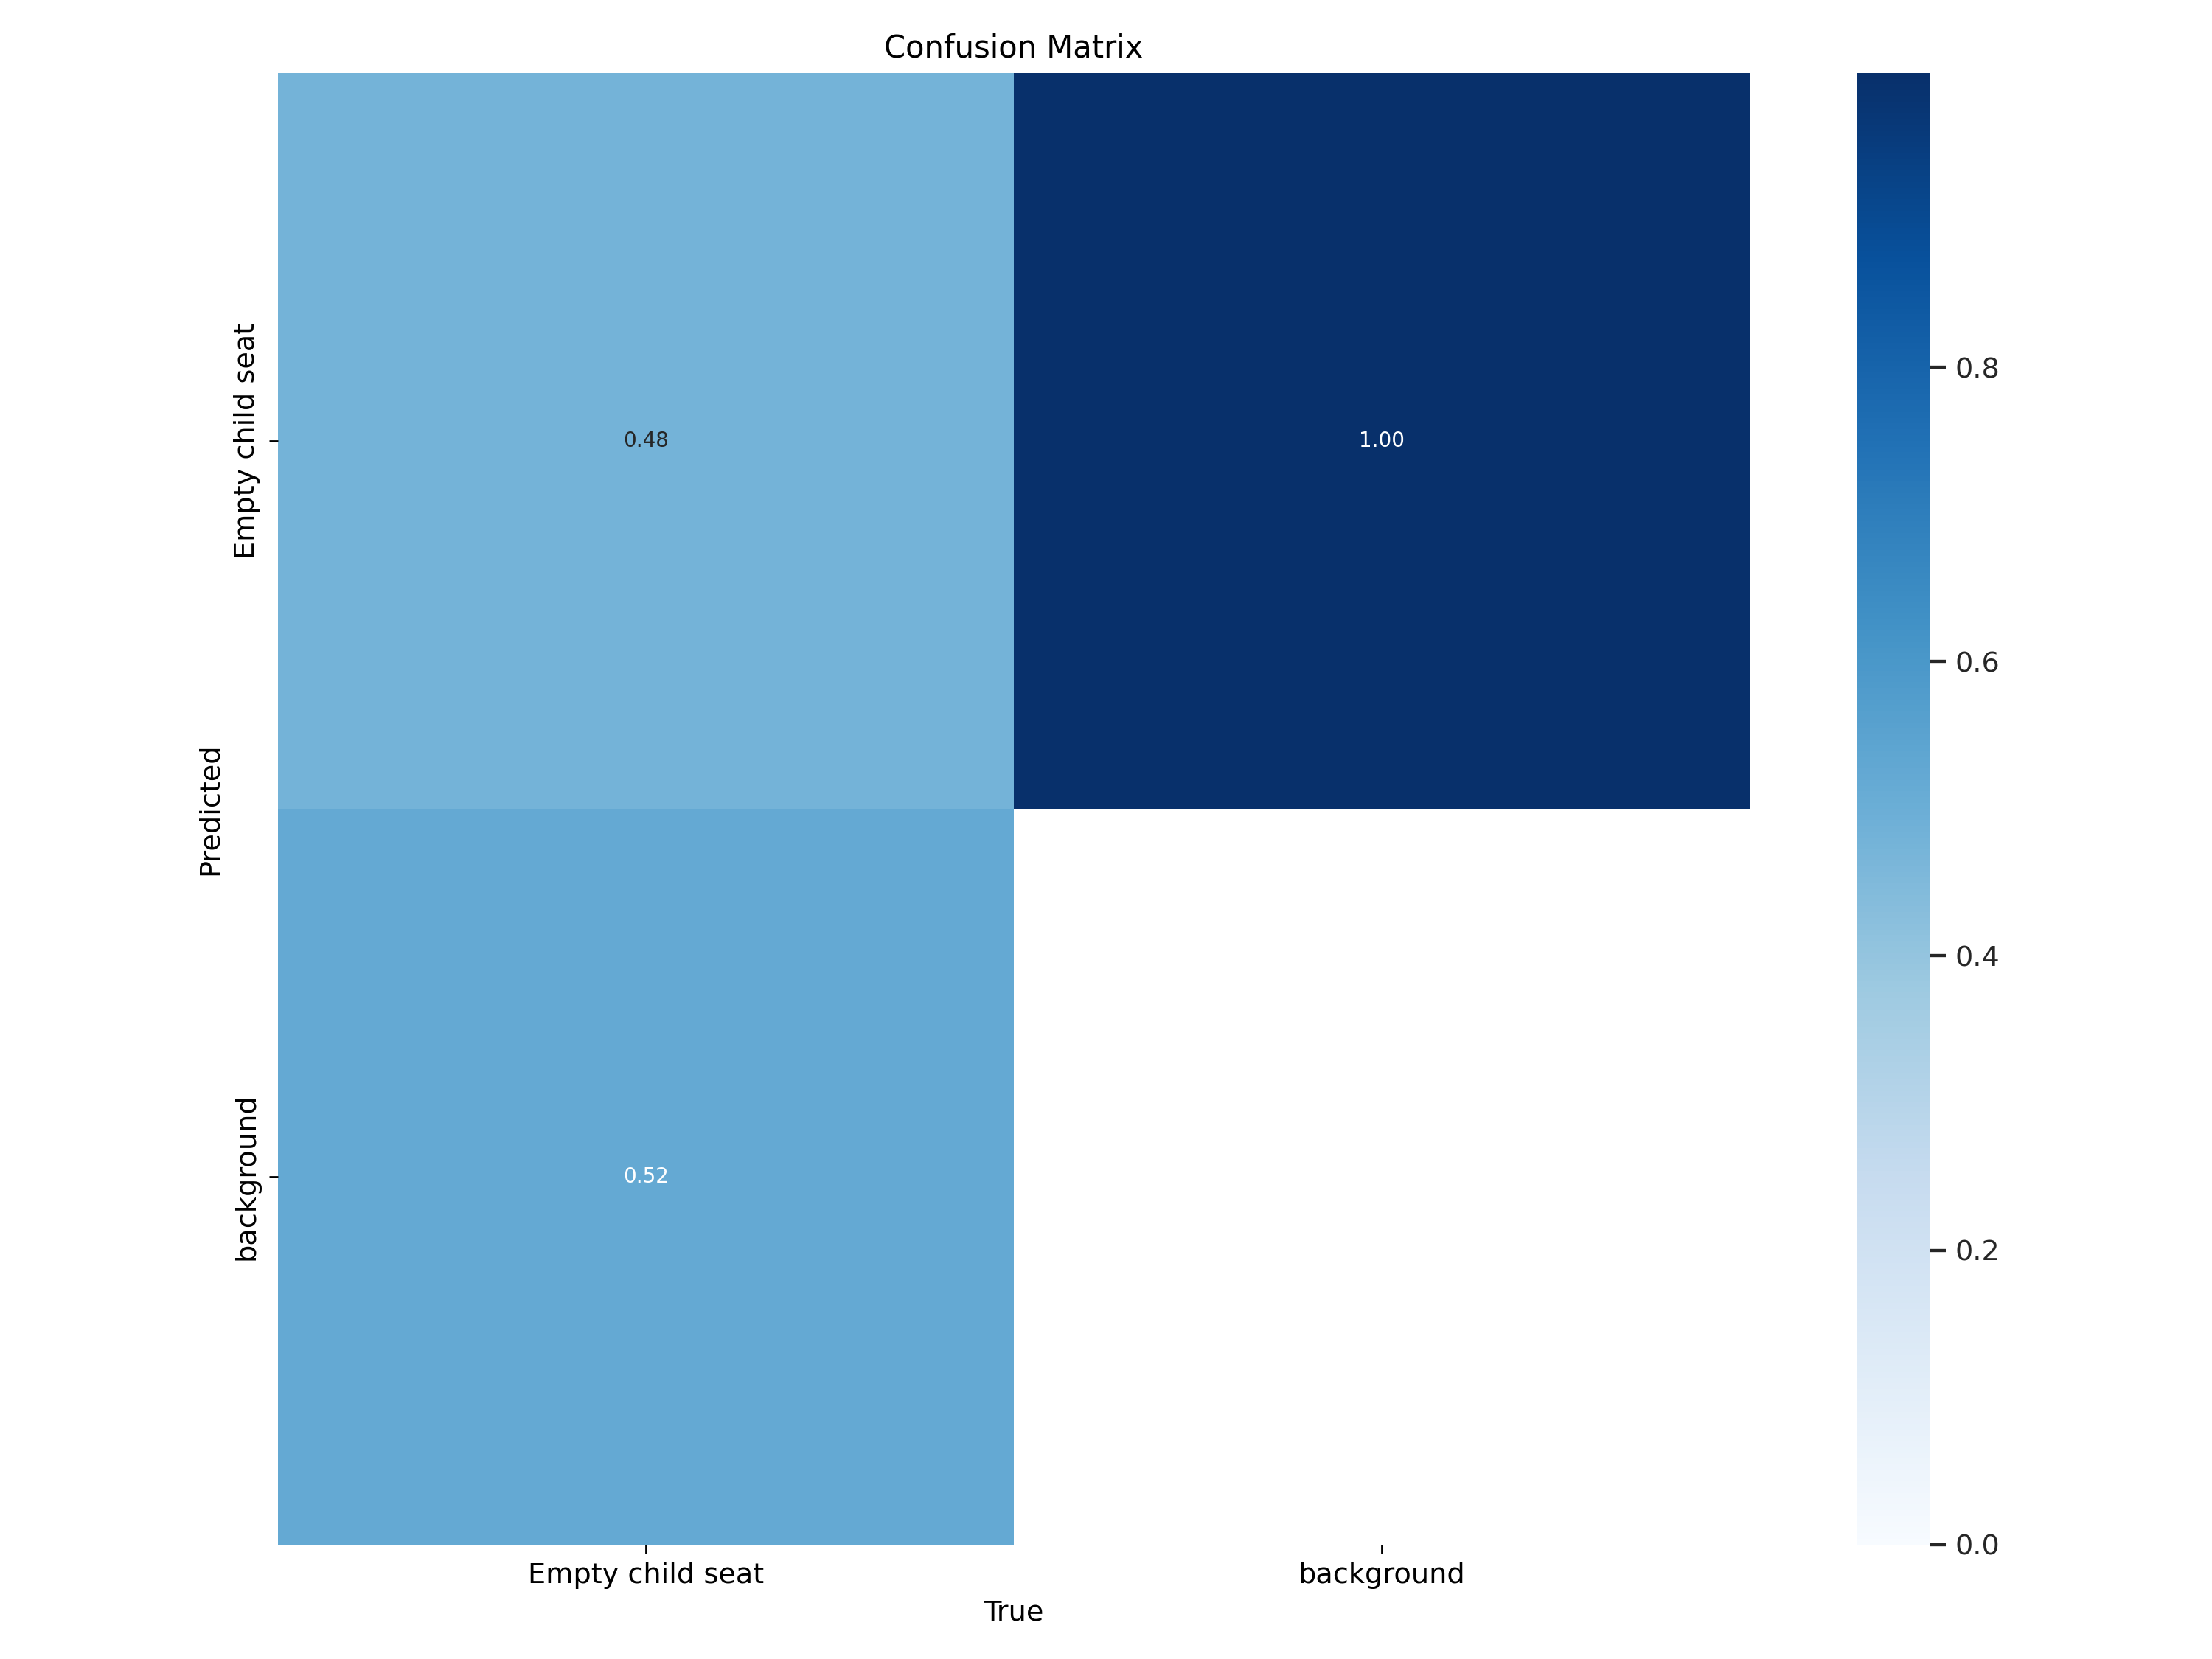

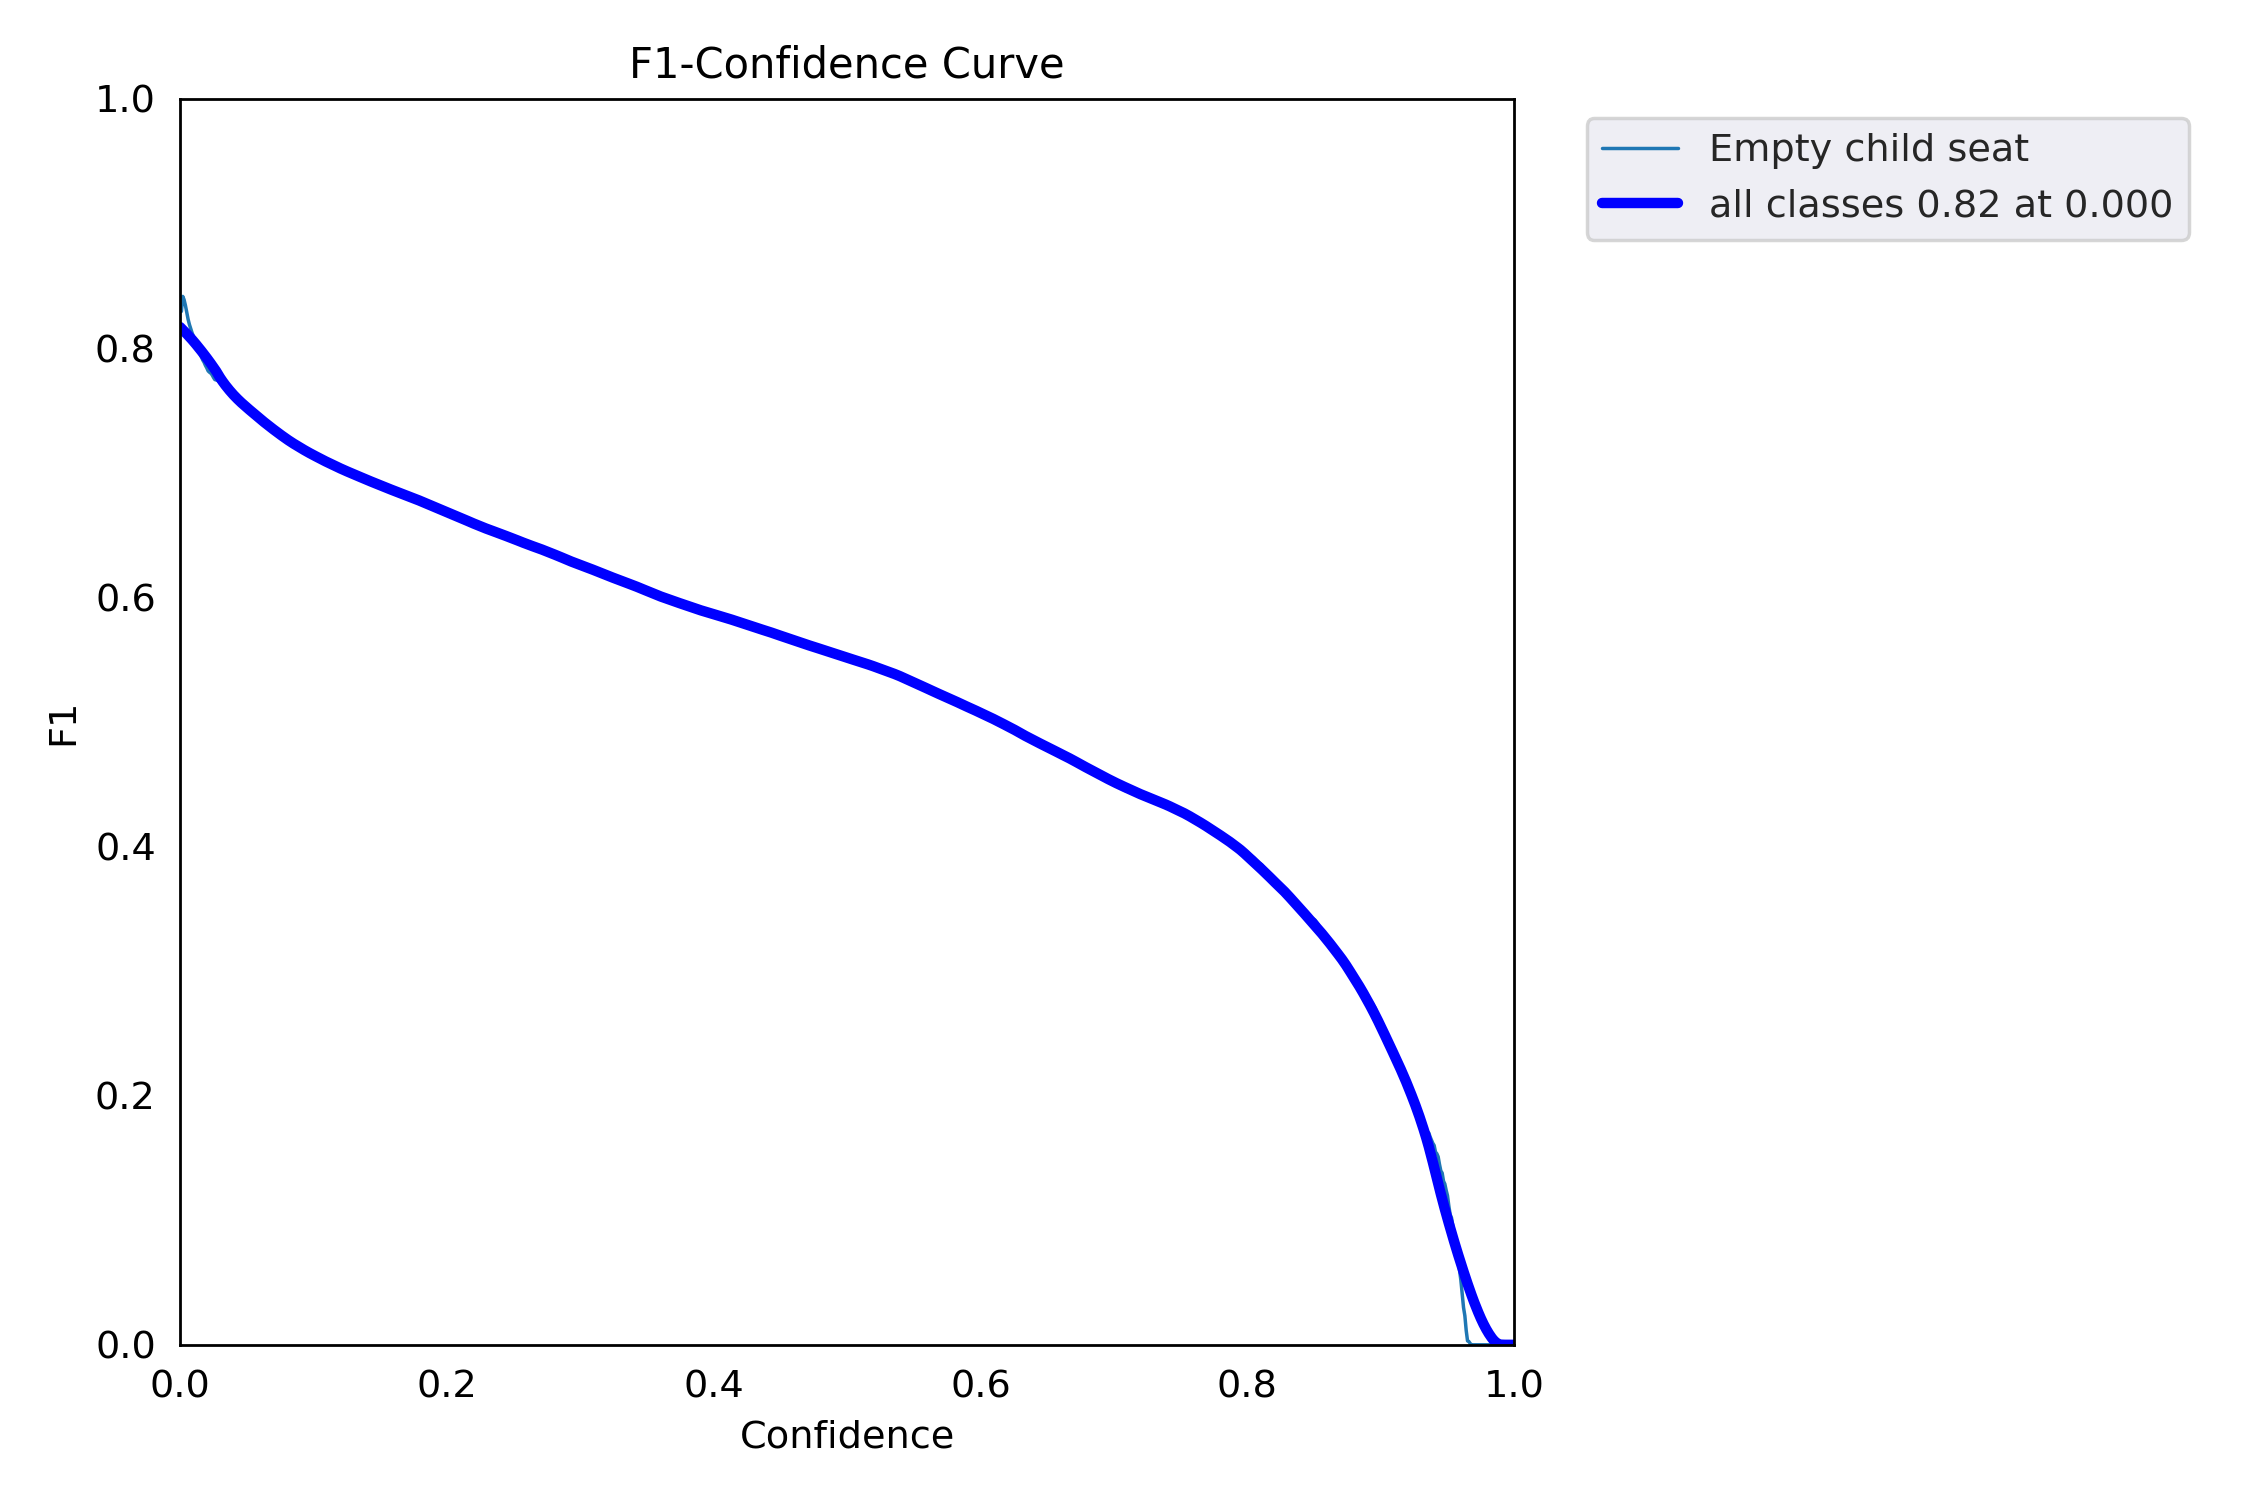

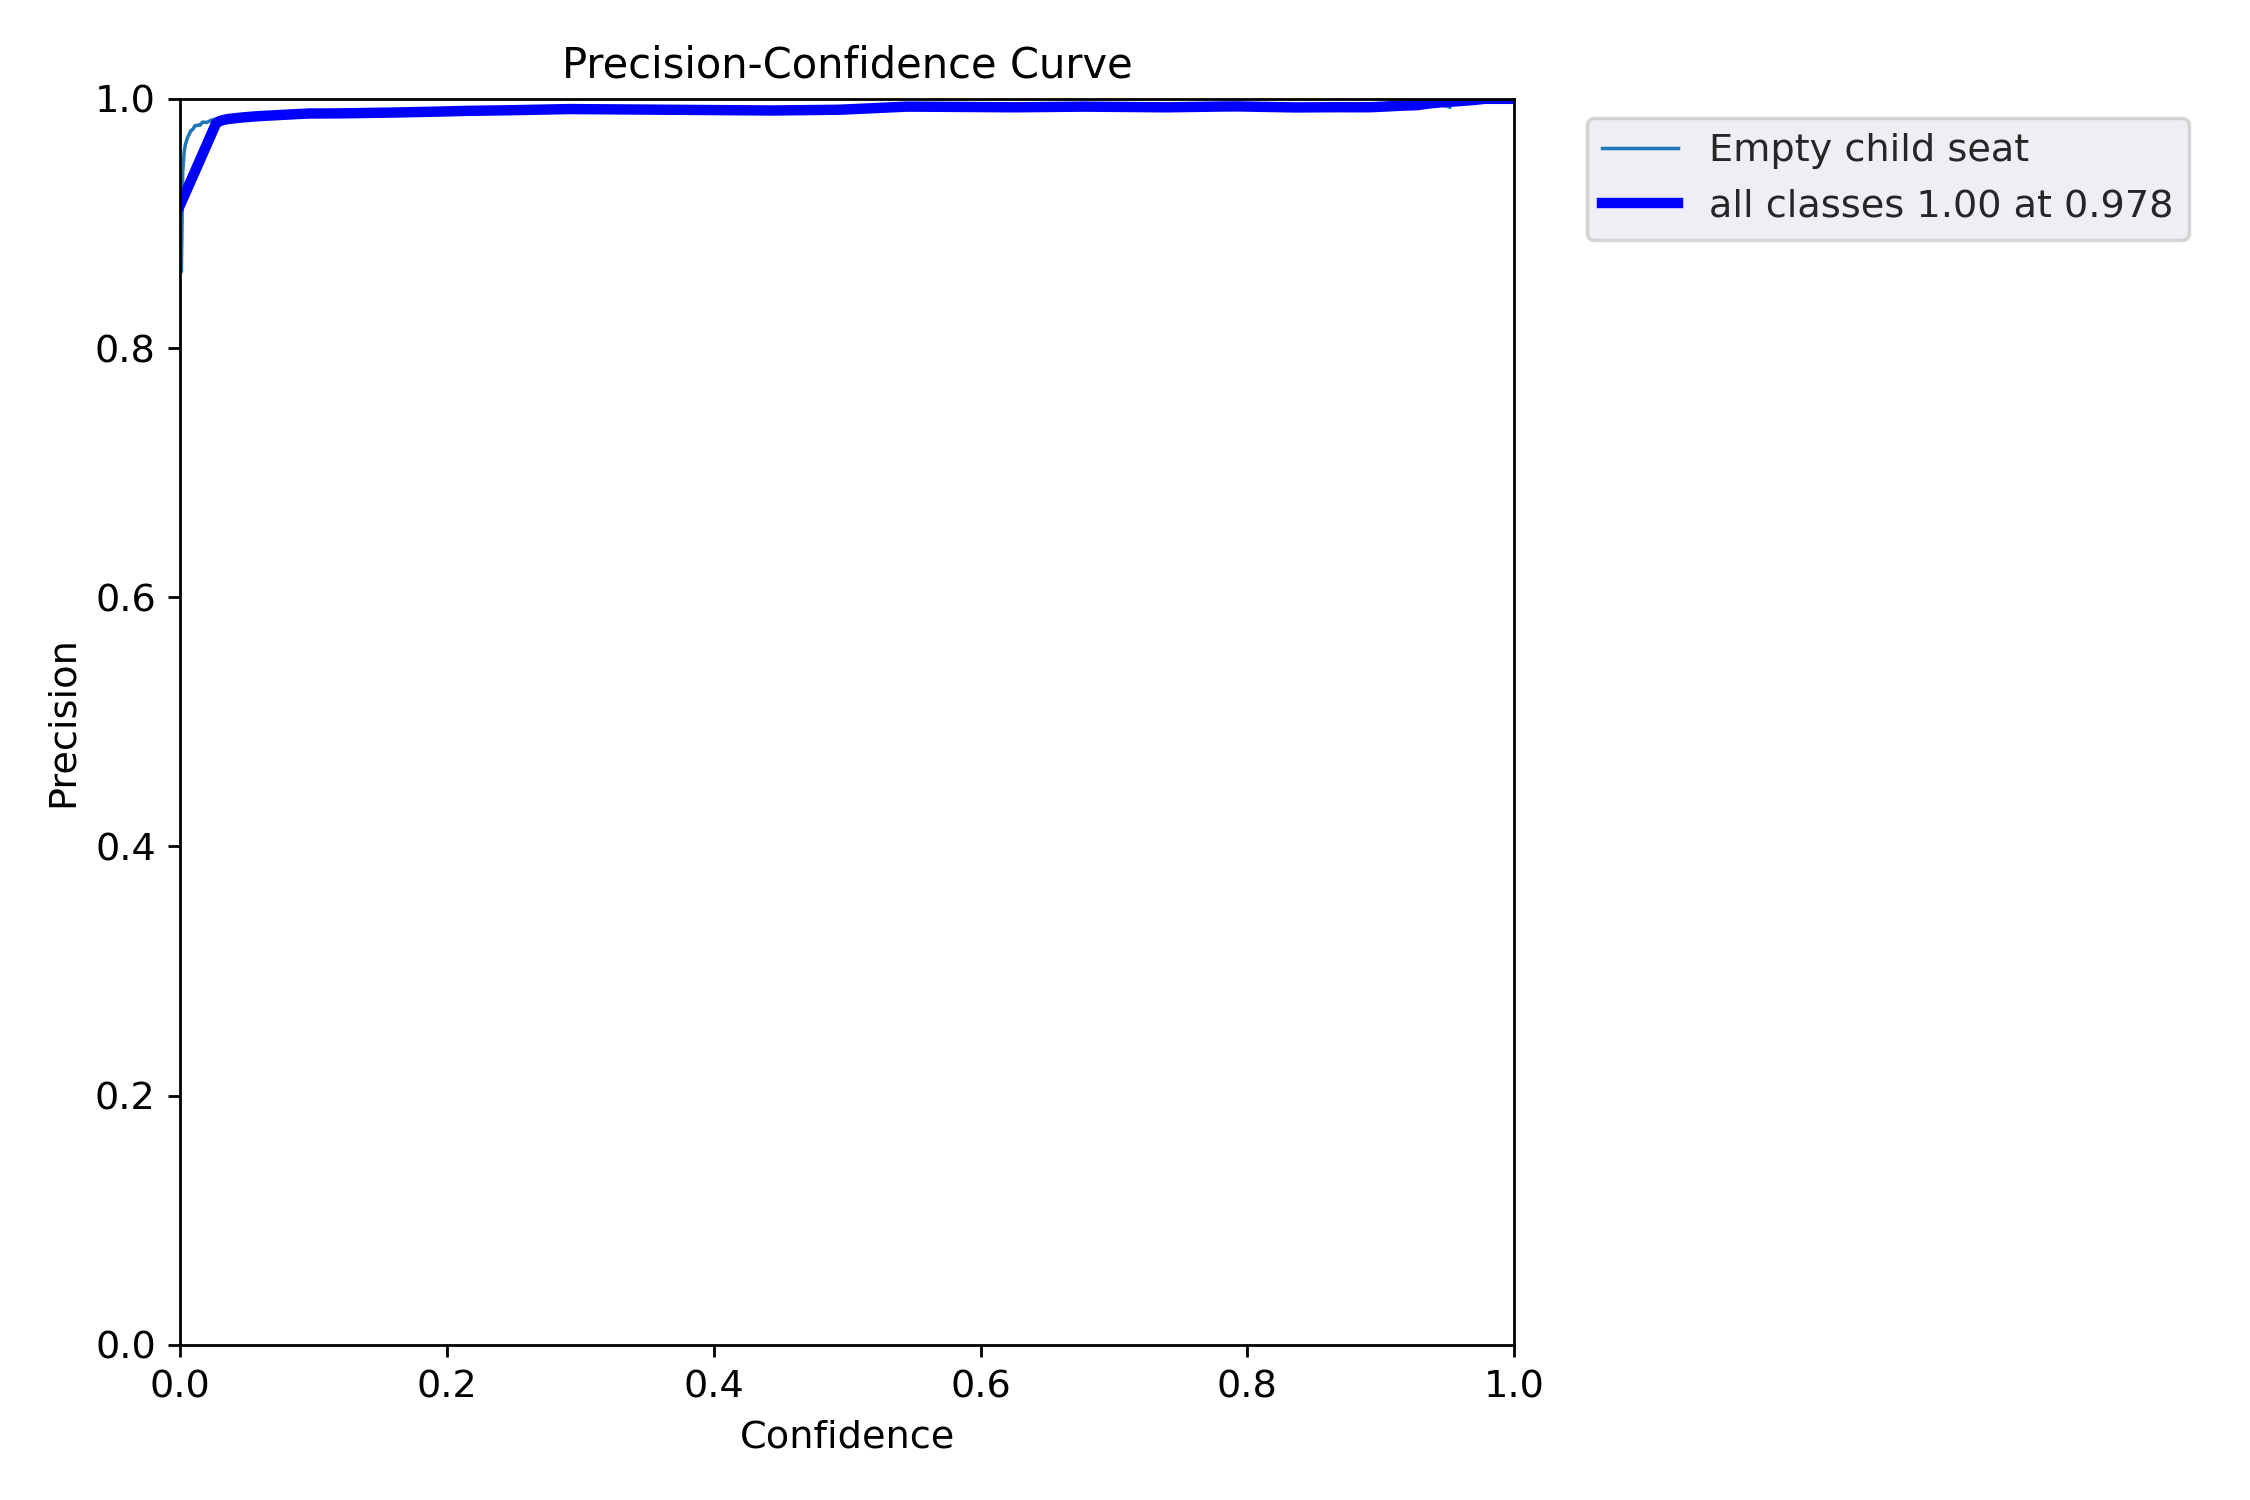

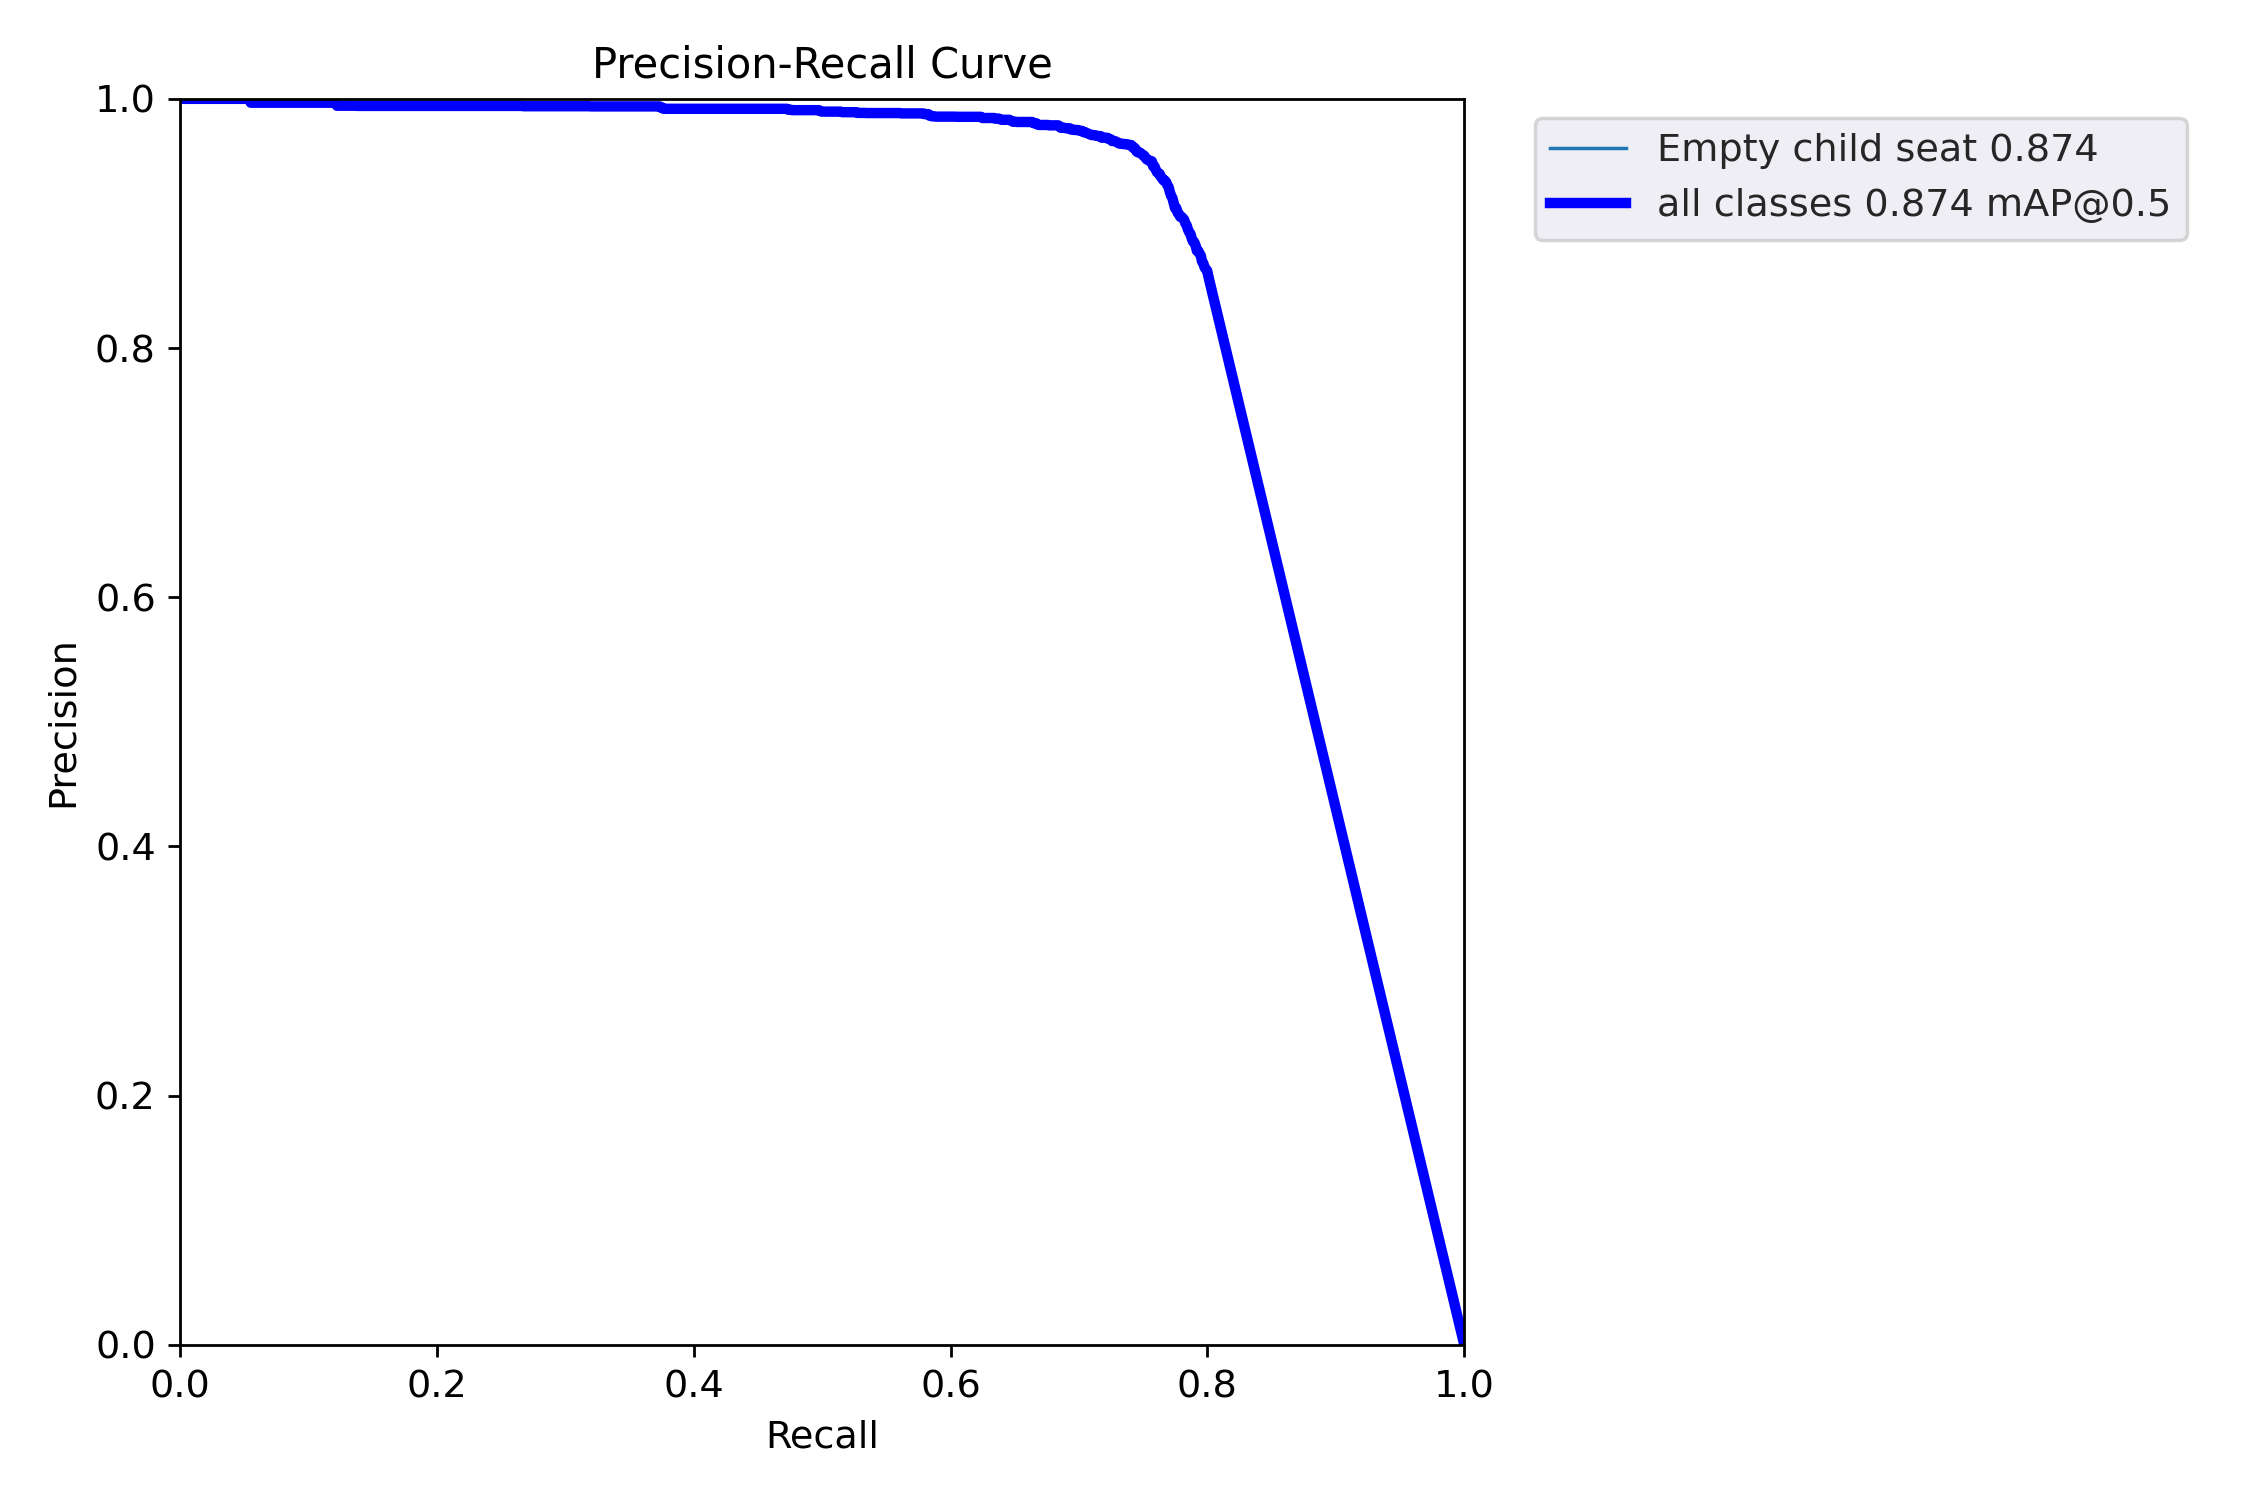

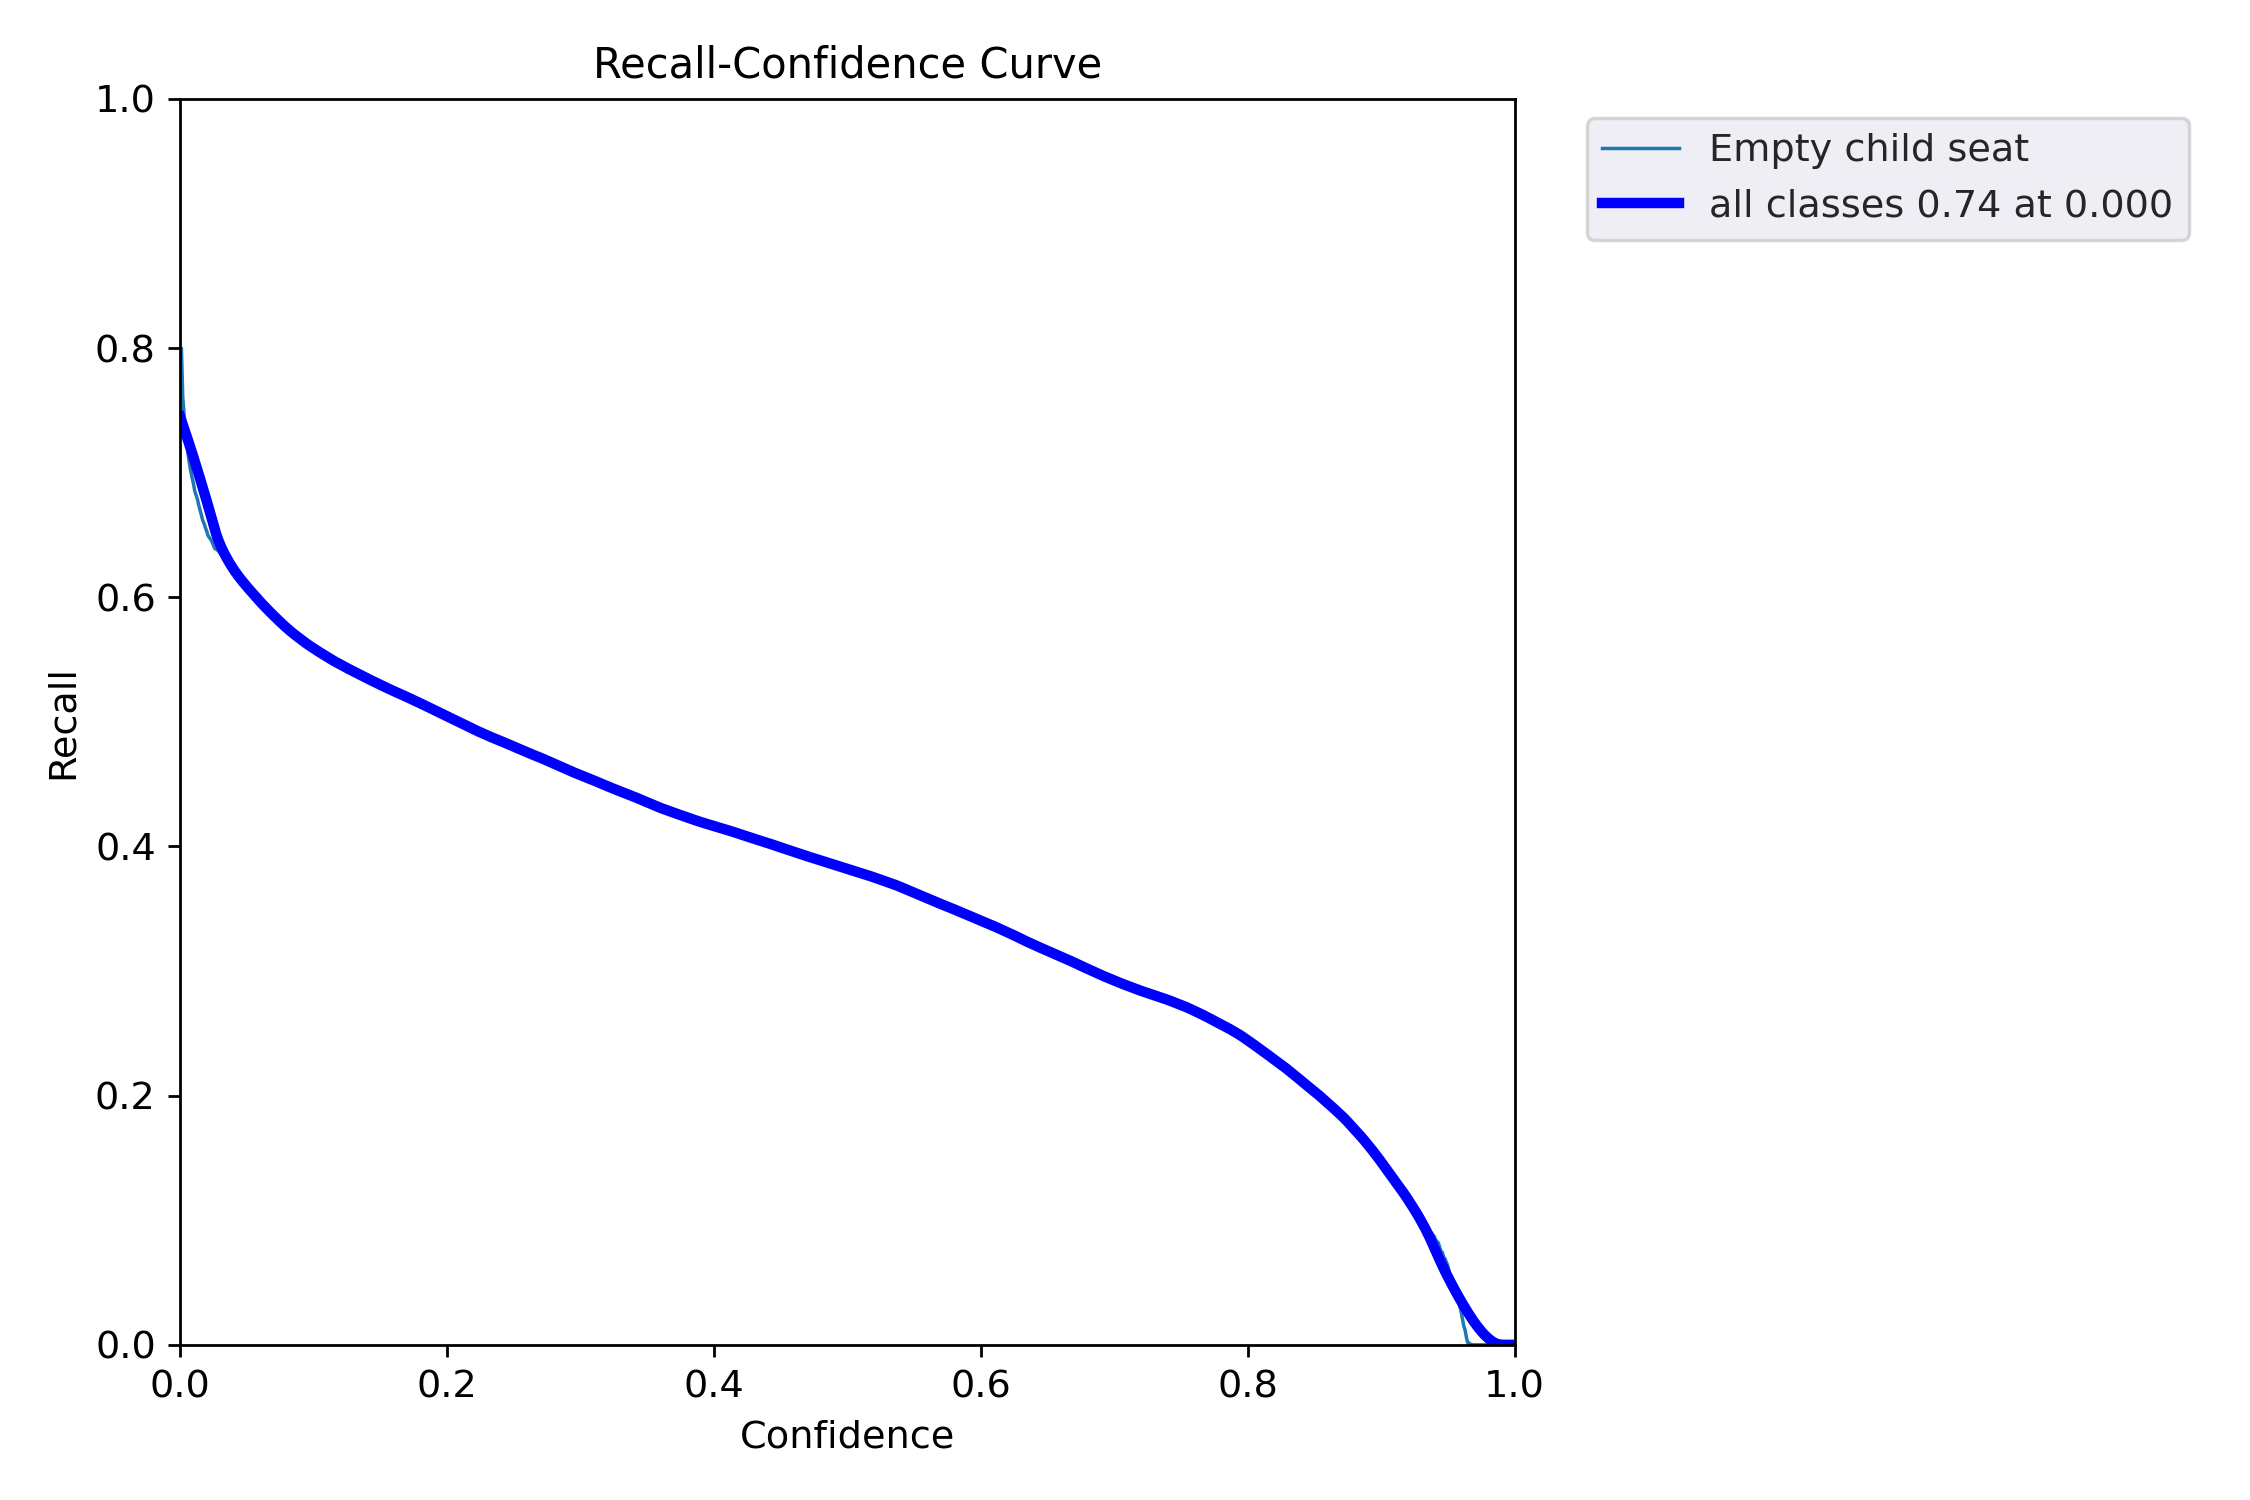

In [12]:
# Paths to the images
cm_path = './runs/val/exp_rgb/confusion_matrix.png'
f1_curve_path = './runs/val/exp_rgb/F1_curve.png'
p_curve_path = './runs/val/exp_rgb/P_curve.png'
pr_curve_path = './runs/val/exp_rgb/PR_curve.png'
r_curve_path = './runs/val/exp_rgb/R_curve.png'

# Function to read and display the image
def plot_image(image_path, title):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    display(image)
    plt.close()

# Plot the images
plot_image(cm_path, "Confusion Matrix")
plot_image(f1_curve_path, "F1 Curve")
plot_image(p_curve_path, "P Curve")
plot_image(pr_curve_path, "PR Curve")
plot_image(r_curve_path, "R Curve")


All metrics of the model trained with grayscale images were superior to the model trained with RGB images, validating my thinking in the data pre-processing stage.

## The end of Inference script

By Ilan Sousa Figueirêdo